# Gaussian Mixture Model (GMM) for Predicting Three Gaussian Distributions    

  
In this experiment, we are using a Gaussian Mixture Model (GMM) to predict the presence of three Gaussian distributions. A GMM is a probabilistic model that assumes the data is generated from a mixture of Gaussian distributions. 
    
The GMM model is trained on a dataset that contains samples from the three Gaussian distributions. The model learns the parameters of the Gaussian distributions, including the mean and covariance, as well as the mixing coefficients that determine the contribution of each Gaussian distribution to the overall mixture.
    
Once the GMM model is trained, it can be used to predict the presence of the three Gaussian distributions in new data. The model assigns a probability to each data point indicating the likelihood that it belongs to each Gaussian distribution. The predicted distribution for each data point is determined by selecting the Gaussian distribution with the highest probability.
    
By using a GMM model, we can effectively capture the complex patterns and relationships present in the data, allowing us to make accurate predictions about the underlying Gaussian distributions. This approach is particularly useful in scenarios where the data is not easily separable or follows a non-linear pattern.
    
Overall, the GMM model provides a powerful tool for predicting the presence of multiple Gaussian distributions and can be applied to a wide range of applications, including clustering, anomaly detection, and generative modeling.

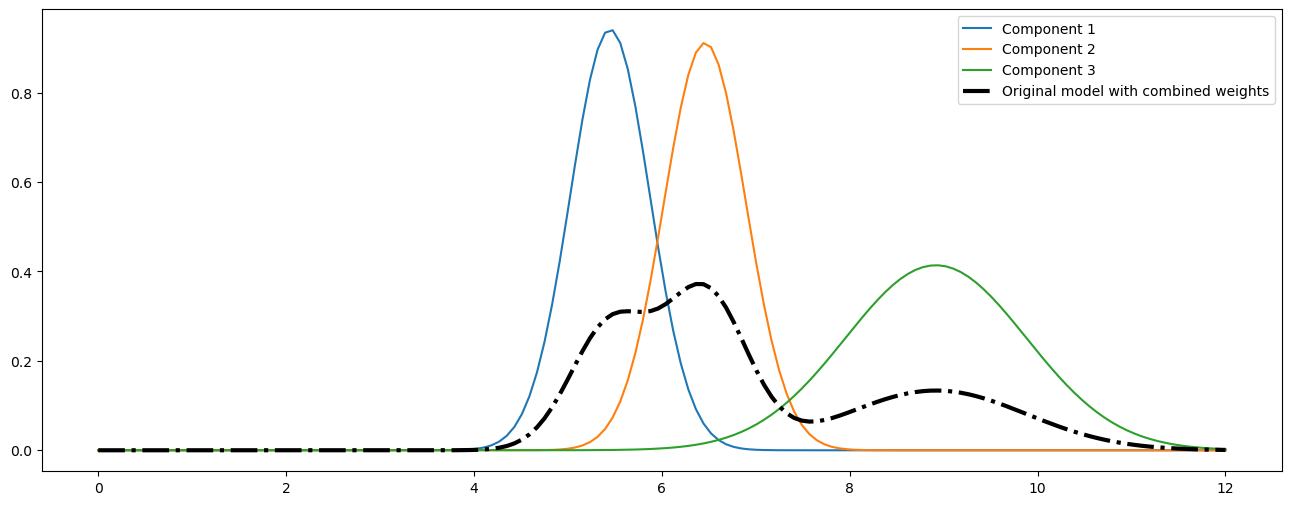

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
np.random.seed(0)

num_dist = 3
# Generate random weights
weights = [np.random.uniform(0, 1) for _ in range(num_dist)]
# Normalize the weights and mu
weights /= np.sum(weights)
mu_sig = np.array([np.random.uniform(0, 10) for _ in range(num_dist*2)])

v = .1
mu_sig = mu_sig.reshape(num_dist, 2)
# Generate the mixture model
generative_m = np.array([stats.norm(i[0], i[1]*v) for i in mu_sig])
func = lambda x: sum([w * g.pdf(x) for w, g in zip(weights, generative_m)])

elements = [i for i in range(num_dist)]
draw = np.random.choice(elements,size = 1000,  p=weights)

x_i = np.array([g.rvs() for g in generative_m[draw]])

# plot generated data and the latent distributions
x = np.linspace(0, 12, 150)
plt.figure(figsize=(16, 6))
for i in range(num_dist):
    plt.plot(x, generative_m[i].pdf(x), label=f'Component {i+1}')
plt.plot(x, func(x), lw=3, ls='-.', color='black', label='Original model with combined weights')
plt.legend()


In [2]:
class EM:
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.std = np.ones(k)
        self.w_ij = None
        self.phi = np.ones(k) / k

    def expectation_step(self, x):
        for z_i in range(self.k):
            self.w_ij[z_i] = stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) * self.phi[z_i]
	# normalize zo that marginalizing z would lead to p = 1
	
        # Fix ?
        self.w_ij /= self.w_ij.sum(0)

    def maximization_step(self, x):
        self.phi = self.w_ij.mean(1)
        self.std = ((self.w_ij * (x - self.mu[:, None])**2).sum(1) / self.w_ij.sum(1))**0.5
        self.mu = (self.w_ij * x).sum(1) / self.w_ij.sum(1)

    def fit(self, x):
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.w_ij = np.zeros((self.k, x.shape[0]))

        last_mu = np.ones(self.k) * np.inf
        i = 0
        while ~np.all(np.isclose(self.mu, last_mu)):
            last_mu = self.mu
            # print(self.mu)
            print(f'Iteration {i}')
            self.expectation_step(x)
            self.maximization_step(x)
            i+=1

k = 5
m = EM(k)

m.fit(x_i)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

phi: [0.2434628  0.15310905 0.35271438 0.01727727 0.23343651], mu: [ 9.0978181   7.08662845  5.51983898 10.71646861  6.48958435], std: [0.6156275  0.71340452 0.45600275 0.24553275 0.33326307]


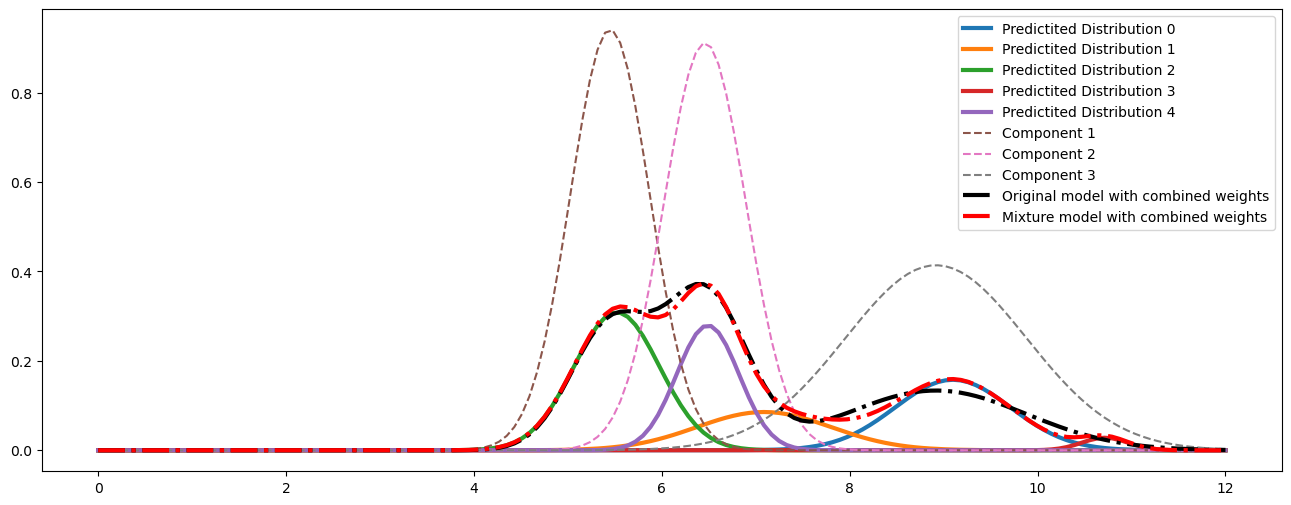

In [3]:
print(f'phi: {m.phi}, mu: {m.mu}, std: {m.std}')


def plot_all(x=x, k=k, m=m, generative_m=generative_m, with_weights=False):
    fitted_m = [stats.norm(mu, std) for mu, std in zip(m.mu, m.std)]
    plt.figure(figsize=(16, 6))
    if with_weights:
        for i in range(k):
            plt.plot(x, m.phi[i]*fitted_m[i].pdf(x), label=f'Predictited Distribution {i}', lw=3)
    else:
        for i in range(k):
            plt.plot(x, fitted_m[i].pdf(x), label=f'Predictited Distribution {i}', lw=3)

    for i in range(num_dist):
        plt.plot(x, generative_m[i].pdf(x), label=f'Component {i+1}', ls='--')
    plt.plot(x, func(x), lw=3, ls='-.', color='black', label='Original model with combined weights')
    plt.plot(x, np.array([m.phi[i]*fitted_m[i].pdf(x) for i in range(k)]).sum(0), lw=3, ls='-.', color='red', label='Mixture model with combined weights')
    plt.legend()
    
plot_all(with_weights=True)

/tmp/ipykernel_40154/1570559362.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_axis = stats.norm.pdf(x_axis, float(g_mean[i]), np.sqrt(float(g_covs[i][0][0])))*g_weights[i]


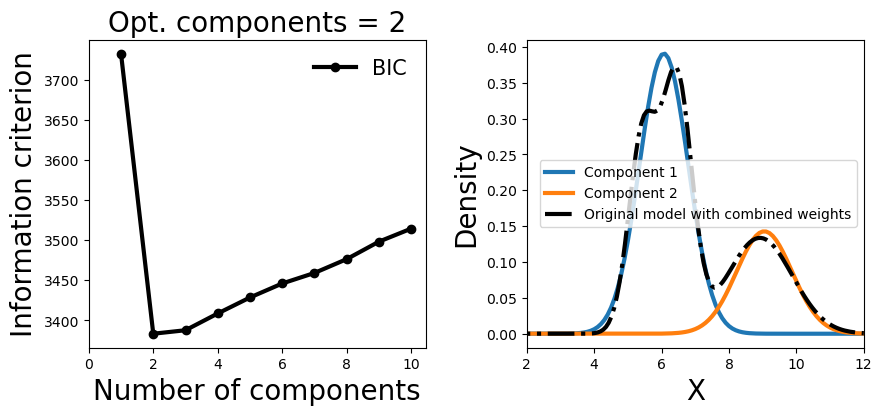

In [4]:
from sklearn.mixture import GaussianMixture

x1 = x_i.reshape(-1,1)
# first of all, let's confirm the optimal number of components
bics = []
min_bic = 0
counter=1
for i in range (10): # test the AIC/BIC metric between 1 and 10 components
  gmm = GaussianMixture(n_components = counter, max_iter=1000, random_state=0, covariance_type = 'full')
  labels = gmm.fit(x1).predict(x1)
  bic = gmm.bic(x1)
  bics.append(bic)
  if bic < min_bic or min_bic == 0:
    min_bic = bic
    opt_bic = counter
  counter = counter + 1


# plot the evolution of BIC/AIC with the number of components
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
# Plot 1
plt.plot(np.arange(1,11), bics, 'o-', lw=3, c='black', label='BIC')
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Information criterion', fontsize=20)
plt.xticks(np.arange(0,11, 2))
plt.title('Opt. components = '+str(opt_bic), fontsize=20)


# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = opt_bic

# create GMM model object
gmm = GaussianMixture(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
g_mean = gmm.fit(x1).means_  
g_covs  = gmm.fit(x1).covariances_
g_weights = gmm.fit(x1).weights_

# create necessary things to plot
x_axis = np.arange(-10, 15, 0.1)
# y_axis0 = stats.norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
# y_axis1 = stats.norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

ax = fig.add_subplot(1,2,2)
# Plot 2
# plt.hist(x, density=True, bins=1000, histtype='bar', ec='red', alpha=0.5)
for i in range(n_optimal):
  y_axis = stats.norm.pdf(x_axis, float(g_mean[i]), np.sqrt(float(g_covs[i][0][0])))*g_weights[i]
  ax.plot(x_axis, y_axis, lw=3, label='Component '+str(i+1))
plt.plot(x, func(x), lw=3, ls='-.', color='black', label='Original model with combined weights')
plt.xlim(2, 12)
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)
plt.legend()

plt.subplots_adjust(wspace=0.3)

## Variational Inference with nonlinear programming

In [5]:
#!/usr/bin/env python3
# @author: R. Gowers, S. Al-Izzi, T. Pollington, R. Hill & K. Briggs

import cvxpy as cp
import numpy as np
import math
from scipy.special import xlogy

def channel_capacity(n, m, P, sum_x=1):
    '''
    Boyd and Vandenberghe, Convex Optimization, exercise 4.57 page 207
    Capacity of a communication channel.

    We consider a communication channel, with input X(t)∈{1,..,n} and
    output Y(t)∈{1,...,m}, for t=1,2,... .The relation between the
    input and output is given statistically:
    p_(i,j) = ℙ(Y(t)=i|X(t)=j), i=1,..,m  j=1,...,n

    The matrix P ∈ ℝ^(m*n) is called the channel transition matrix, and
    the channel is called a discrete memoryless channel. Assuming X has a
    probability distribution denoted x ∈ ℝ^n, i.e.,
    x_j = ℙ(X=j), j=1,...,n

    The mutual information between X and Y is given by
    ∑(∑(x_j p_(i,j)log_2(p_(i,j)/∑(x_k p_(i,k)))))
    Then channel capacity C is given by
    C = sup I(X;Y).
    With a variable change of y = Px this becomes
    I(X;Y)=  c^T x - ∑(y_i log_2 y_i)
    where c_j = ∑(p_(i,j)log_2(p_(i,j)))
    '''

    # n is the number of different input values
    # m is the number of different output values
    if n*m == 0:
        print('The range of both input and output values must be greater than zero')
        return 'failed', np.nan, np.nan

    # x is probability distribution of the input signal X(t)
    x = cp.Variable(shape=n)

    # y is the probability distribution of the output signal Y(t)
    # P is the channel transition matrix
    y = P@x
    # I is the mutual information between x and y
    c = np.sum(np.array((xlogy(P, P) )), axis=0)
    I = c@x + cp.sum(cp.entr(y) )
    print(f'c.shape: {c.shape}, x.shape: {x.shape}, y.shape: {y.shape}, I.shape: {I.shape}, P.shape: {P.shape}')
            

    # I = c@x + cp.sum(cp.entr(y) )
    # Channel capacity maximised by maximising the mutual information
    obj = cp.Maximize(I)
    constraints = [cp.sum(x) == sum_x,x >= 0]

    # Form and solve problem
    prob = cp.Problem(obj,constraints)
    prob.solve(solver=cp.ECOS)
    if prob.status=='optimal':
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan

In [6]:
class my_EM:
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.std = np.ones(k)
        self.w_ij = None
        self.phi = np.ones(k) / k

    def expectation_step(self, x):
        for z_i in range(self.k):
            self.w_ij[z_i] = stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) * self.phi[z_i]
	# normalize zo that marginalizing z would lead to p = 1
        # print(f'self.w_ij.shape: {self.w_ij.shape}')
        self.w_ij /= self.w_ij.sum(0)

    def maximization_step(self, x):
        # self.phi = self.w_ij.mean(1)
        P = np.array([stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) for z_i in range(self.k)]).T
    
        stat, C, _phi = channel_capacity(self.k, len(x), P)
        self.phi = _phi
        print('Optimal value of C = {:.4g}'.format(C))
        print('Optimal variable phi = \n', self.phi)
        
        self.std = ((self.w_ij * (x - self.mu[:, None])**2).sum(1) / self.w_ij.sum(1))**0.5
        self.mu = (self.w_ij * x).sum(1) / self.w_ij.sum(1)
        print(f'x.shape: {x.shape}, mu.shape: {self.mu.shape}, std.shape: {self.std.shape}')
    def fit(self, x):
        
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.w_ij = np.zeros((self.k, x.shape[0]))

        last_mu = np.ones(self.k) * np.inf
        i = 0
        while ~np.all(np.isclose(self.mu, last_mu)):
            print(f'iteration: {i}')
            last_mu = self.mu
            self.expectation_step(x)
            self.maximization_step(x)
            i+=1

k = 3
m1 = my_EM(k)
m1.fit(x_i)

iteration: 0
c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 37.24
Optimal variable phi = 
 [ 5.56987495e-01 -4.19498586e-11  4.43012505e-01]
x.shape: (1000,), mu.shape: (3,), std.shape: (3,)
iteration: 1
c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 56.59
Optimal variable phi = 
 [ 5.68033997e-01 -8.35982100e-11  4.31966003e-01]
x.shape: (1000,), mu.shape: (3,), std.shape: (3,)
iteration: 2
c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 79.81
Optimal variable phi = 
 [ 5.42627931e-01 -3.17613323e-10  4.57372069e-01]
x.shape: (1000,), mu.shape: (3,), std.shape: (3,)
iteration: 3
c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 84.46
Optimal variable phi = 
 [ 5.33735056e-01 -2.89940237e-10  4.6626

/home/jack/venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 81.87
Optimal variable phi = 
 [ 5.27970182e-01 -3.44830522e-10  4.72029817e-01]
x.shape: (1000,), mu.shape: (3,), std.shape: (3,)
iteration: 5
c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 77.13
Optimal variable phi = 
 [ 5.22373634e-01 -3.00662599e-10  4.77626366e-01]
x.shape: (1000,), mu.shape: (3,), std.shape: (3,)
iteration: 6
c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 73.12
Optimal variable phi = 
 [ 5.18015004e-01 -2.93475412e-10  4.81984996e-01]
x.shape: (1000,), mu.shape: (3,), std.shape: (3,)
iteration: 7
c.shape: (3,), x.shape: (np.int32(3),), y.shape: (np.int32(1000),), I.shape: (), P.shape: (1000, 3)
Optimal value of C = 70.47
Optimal variable phi = 
 [ 5.15195528e-01 -1.43687198e-10  4.84804472e-01]
x.s

phi: [5.11642919e-01 1.66520087e-10 4.88357081e-01], mu: [8.11717688 5.91356999 5.89399434], std: [1.43769156 0.61834686 0.61840143]


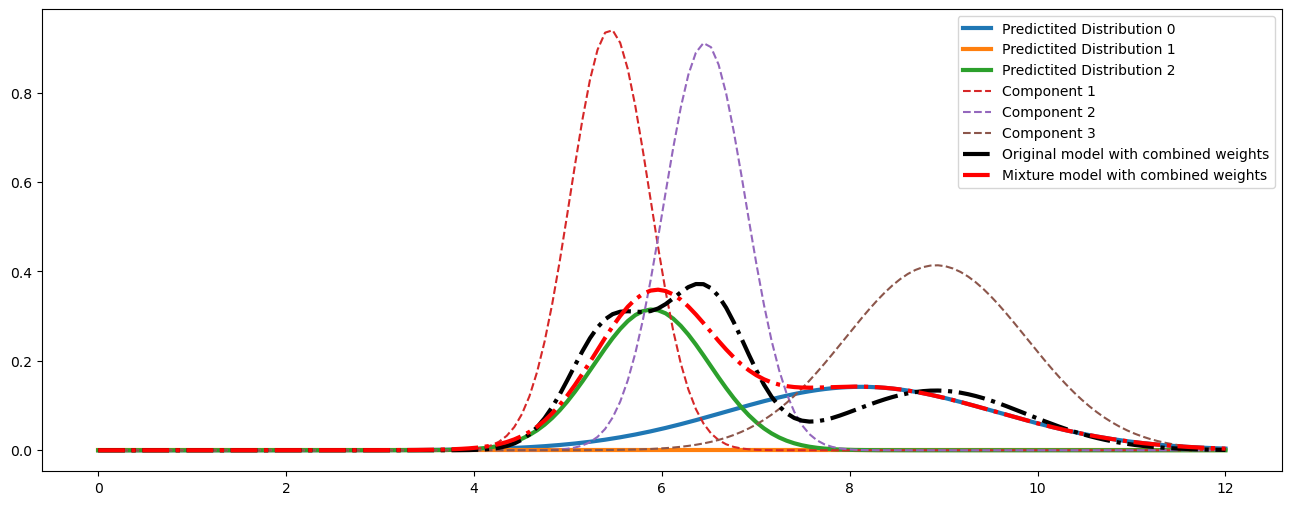

In [7]:
print(f'phi: {m1.phi}, mu: {m1.mu}, std: {m1.std}')
plot_all(m=m1, k =k, with_weights=True)

## 2D experiments

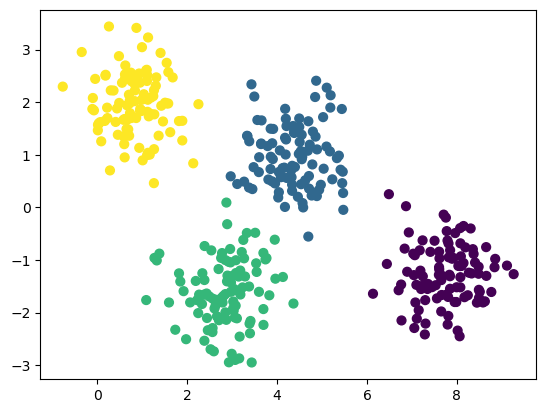

In [295]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [285]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle = angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

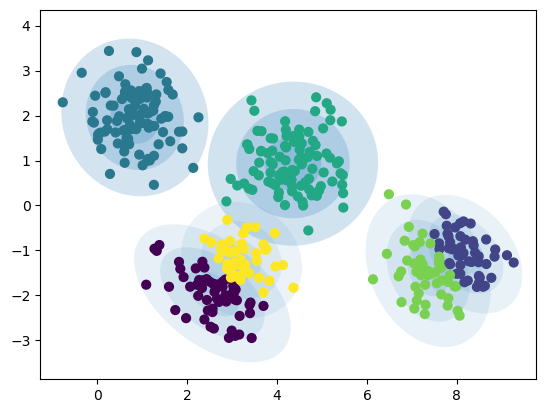

In [286]:
gmm = GaussianMixture(n_components=6, random_state=42)

plot_gmm(gmm, X)

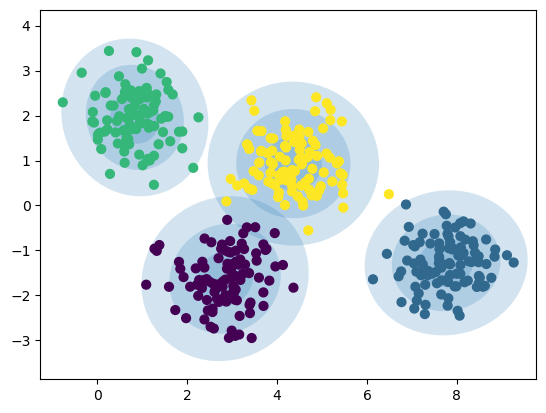

In [287]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm,X)

In [8]:
from sklearn.datasets import make_spd_matrix
np.random.seed(0)
# define the number of samples to be drawn
n_samples = 100
# define the mean points for each of the systhetic cluster centers
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]

# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
  t_covs.append(make_spd_matrix(2))

X = []
for mean, cov in zip(t_means,t_covs):
  x = np.random.multivariate_normal(mean, cov, n_samples)
  X += list(x)
  
X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T
print(pos.shape)
print(np.max(pos[...,1]))

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k,X.shape[1]))
print(means)
print(weights)
# create and initialize a Positive semidefinite convariance matrix 
cov = []
for i in range(k):
  cov.append(make_spd_matrix(X.shape[1]))
  
cov = np.array(cov)
print(cov.shape)

Dataset shape: (400, 2)
(8000, 2)
10.603064122240198
[[8.50225376 5.18307425]
 [6.50756745 6.45989619]
 [6.45989619 6.578757  ]]
[0.33333333 0.33333333 0.33333333]


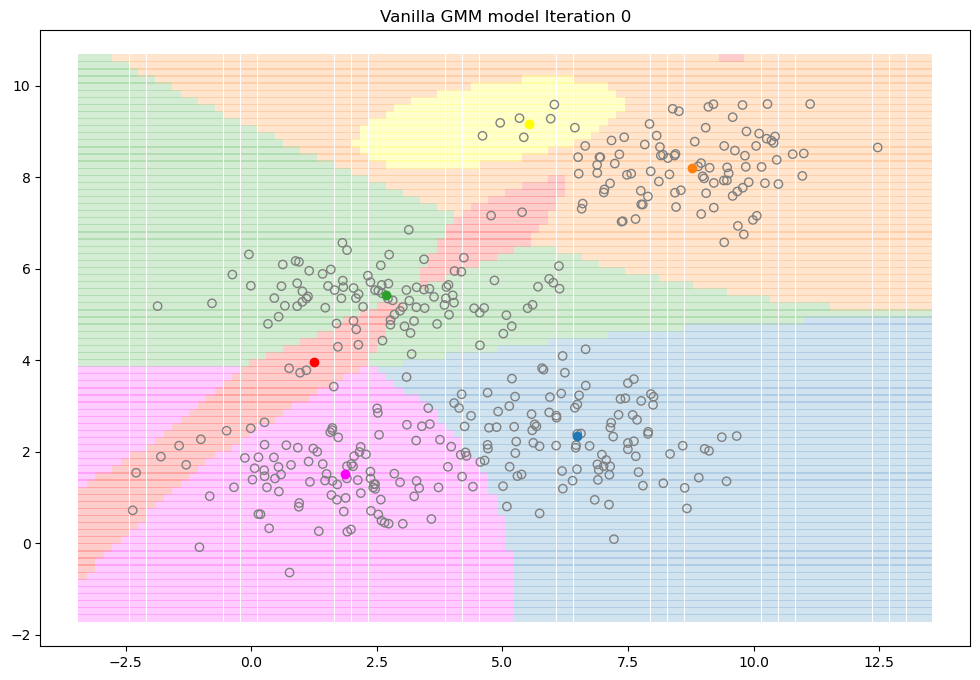

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


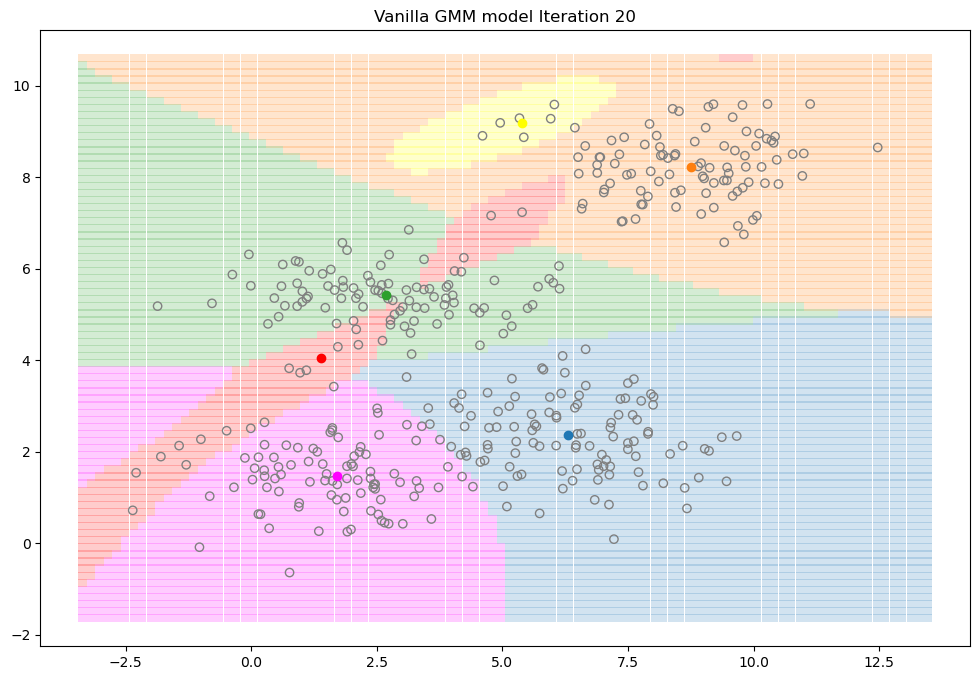

weights: [0.26732944 0.23077048 0.22391343 0.22449307 0.01443024 0.03904479],
 means:
 [[6.31123898 2.35458959]
 [8.75139046 8.2155503 ]
 [2.67954258 5.43459587]
 [1.70337994 1.46215425]
 [5.38681273 9.1928673 ]
 [1.38088584 4.05531153]],
 cov:
 [[[ 2.39611943 -0.27065682]
  [-0.27065682  0.70091887]]

 [[ 1.78156927  0.16162925]
  [ 0.16162925  0.49941474]]

 [[ 2.80246075 -0.11373771]
  [-0.11373771  0.25067855]]

 [[ 1.82989099  0.06999132]
  [ 0.06999132  0.52204479]]

 [[ 0.26948998  0.08556826]
  [ 0.08556826  0.05829315]]

 [[ 6.18054081  4.8278912 ]
  [ 4.8278912   3.85215388]]]


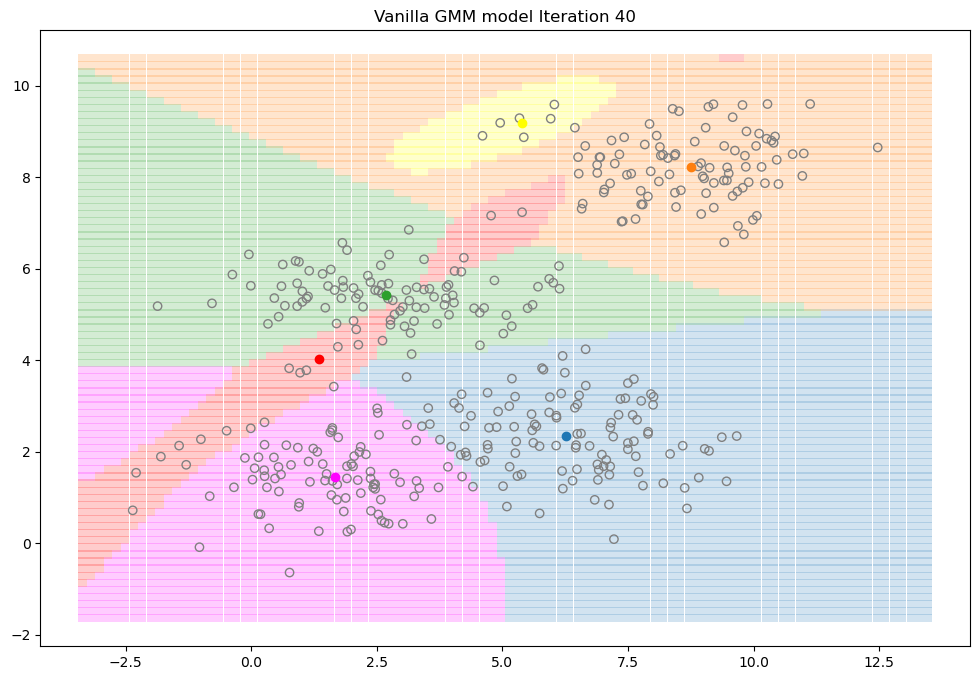

weights: [0.27126131 0.23086032 0.22375806 0.22015578 0.01442531 0.03953447],
 means:
 [[6.27514651 2.35204813]
 [8.75044418 8.2155153 ]
 [2.67968709 5.43525677]
 [1.67229088 1.4491839 ]
 [5.38669524 9.19291557]
 [1.34215805 4.02216728]],
 cov:
 [[[ 2.46486611 -0.26554945]
  [-0.26554945  0.6987192 ]]

 [[ 1.78360748  0.16192942]
  [ 0.16192942  0.49945805]]

 [[ 2.80483394 -0.11391525]
  [-0.11391525  0.25017524]]

 [[ 1.74421217  0.05102236]
  [ 0.05102236  0.51377119]]

 [[ 0.26945513  0.0855966 ]
  [ 0.0855966   0.05829061]]

 [[ 6.15304263  4.80417639]
  [ 4.80417639  3.83354591]]]


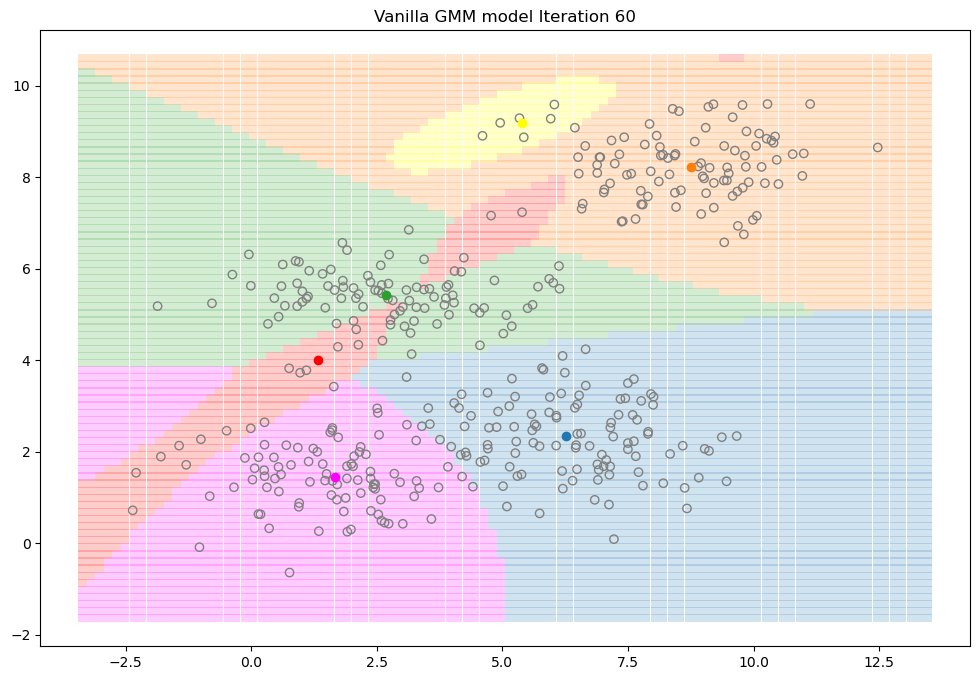

weights: [0.27208017 0.23087923 0.22372785 0.21925732 0.01442432 0.03962927],
 means:
 [[6.26753666 2.35151665]
 [8.75024265 8.21550607]
 [2.67972287 5.43538934]
 [1.66585883 1.44643347]
 [5.38667292 9.19292522]
 [1.33450136 4.01561119]],
 cov:
 [[[ 2.47974296 -0.26447121]
  [-0.26447121  0.6982657 ]]

 [[ 1.78404906  0.16199812]
  [ 0.16199812  0.49946818]]

 [[ 2.80531717 -0.11395466]
  [-0.11395466  0.25007434]]

 [[ 1.72703938  0.04710171]
  [ 0.04710171  0.51198569]]

 [[ 0.26944924  0.08560203]
  [ 0.08560203  0.05829001]]

 [[ 6.14684186  4.79880696]
  [ 4.79880696  3.82926771]]]


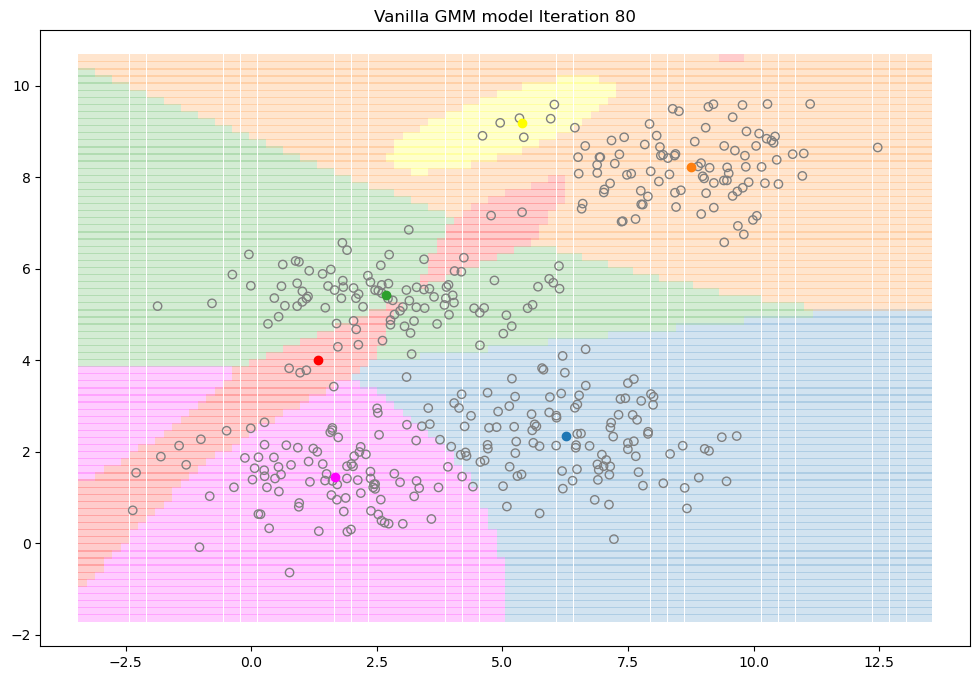

weights: [0.27223931 0.23088289 0.22372209 0.219083   0.01442413 0.03964731],
 means:
 [[6.2660535  2.3514135 ]
 [8.75020362 8.21550422]
 [2.67973004 5.43541482]
 [1.66461005 1.44589699]
 [5.3866686  9.19292709]
 [1.33303737 4.01435758]],
 cov:
 [[[ 2.48265936 -0.26426155]
  [-0.26426155  0.69817785]]

 [[ 1.78413485  0.16201157]
  [ 0.16201157  0.49947017]]

 [[ 2.80541039 -0.11396239]
  [-0.11396239  0.25005491]]

 [[ 1.72373406  0.04634049]
  [ 0.04634049  0.51163586]]

 [[ 0.2694481   0.08560308]
  [ 0.08560308  0.05828989]]

 [[ 6.1456351   4.79776127]
  [ 4.79776127  3.8284328 ]]]


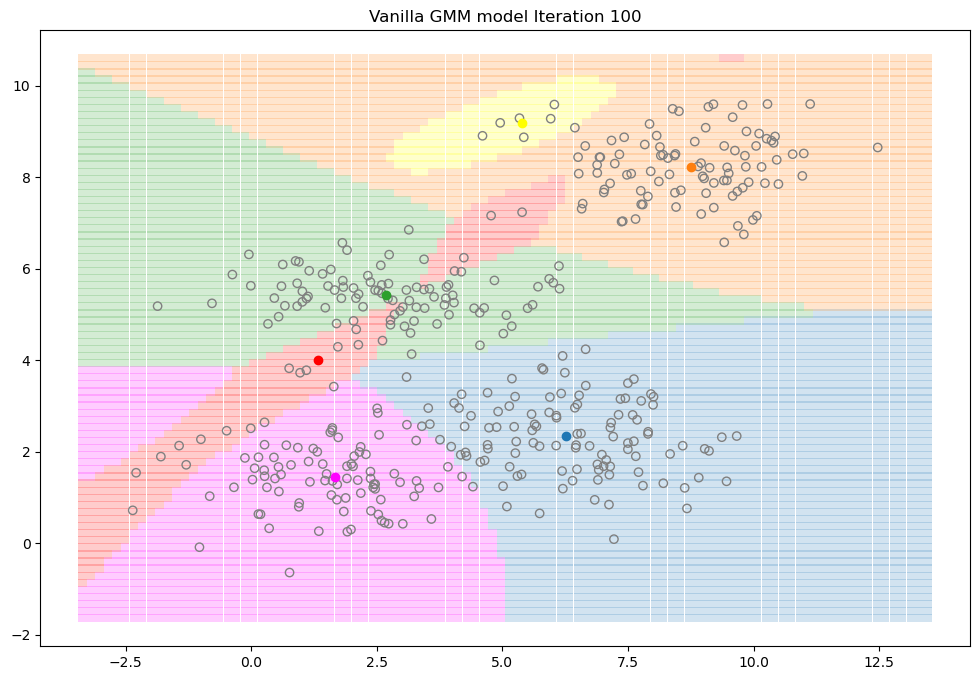

weights: [0.27226978 0.23088358 0.223721   0.21904964 0.0144241  0.03965075],
 means:
 [[6.26576938 2.35139376]
 [8.75019616 8.21550387]
 [2.67973143 5.43541969]
 [1.664371   1.44579421]
 [5.38666778 9.19292745]
 [1.33275808 4.01411844]],
 cov:
 [[[ 2.48321869 -0.26422141]
  [-0.26422141  0.69816104]]

 [[ 1.78415126  0.16201414]
  [ 0.16201414  0.49947055]]

 [[ 2.8054282  -0.11396388]
  [-0.11396388  0.2500512 ]]

 [[ 1.72310247  0.04619477]
  [ 0.04619477  0.51156878]]

 [[ 0.26944789  0.08560328]
  [ 0.08560328  0.05828987]]

 [[ 6.14540445  4.79756139]
  [ 4.79756139  3.82827315]]]


In [336]:
from scipy.stats import multivariate_normal
# define the number of clusters to be learned
k = 6

colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
eps=1e-8
for step in range(101):

  # visualize the learned clusters
  if step % 20 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("Vanilla GMM model Iteration {}".format(step))
    axes = plt.gca()
    
    likelihood = []
    for j in range(k):
      likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
    predictions = np.argmax(likelihood, axis=0)
    
    for c in range(k):
      pred_ids = np.where(predictions == c)
      plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
    for j in range(k):
      plt.scatter(means[j][0], means[j][1], color=colors[j])

    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
    print(f'weights: {weights},\n means:\n {means},\n cov:\n {cov}')

  likelihood = []
  # Expectation step
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # updage mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    weights[j] = np.mean(b[j])
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

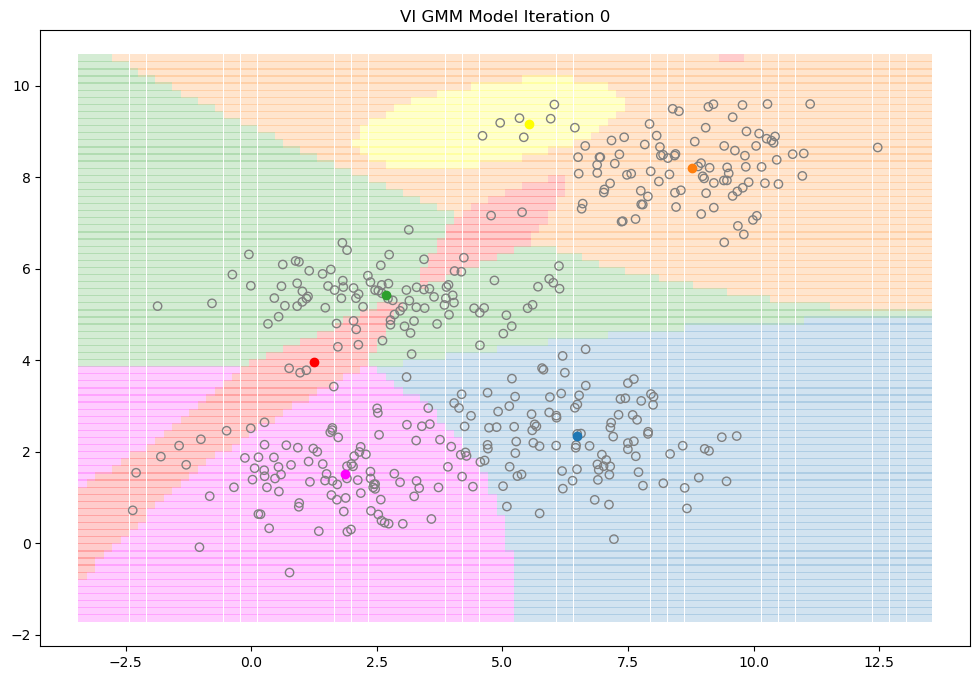

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623278  4.80844195]
  [ 4.80844195  3.84573102]]]


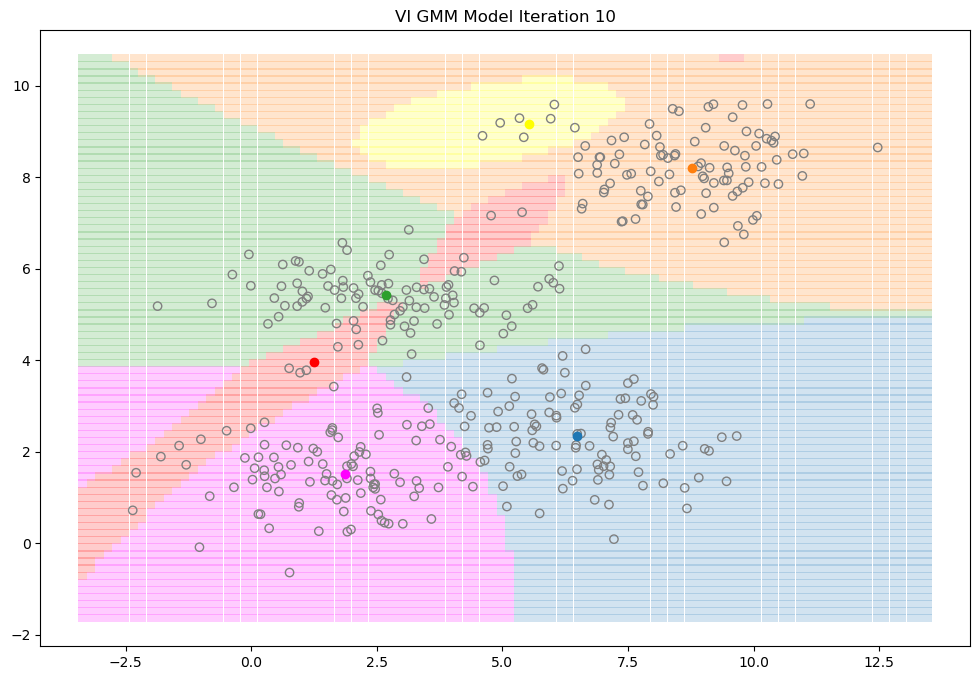

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


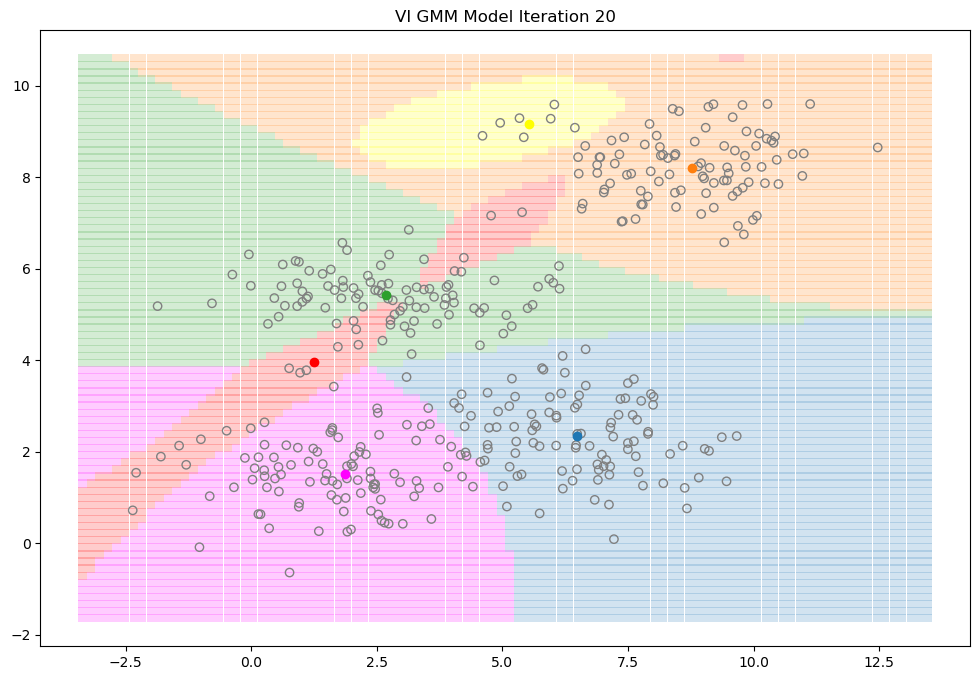

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


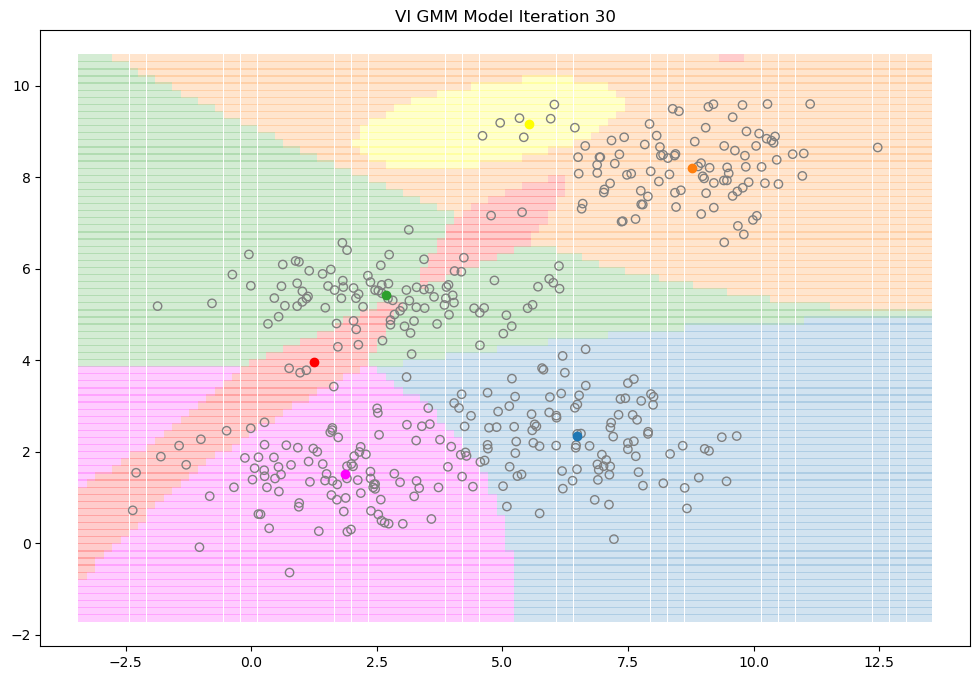

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


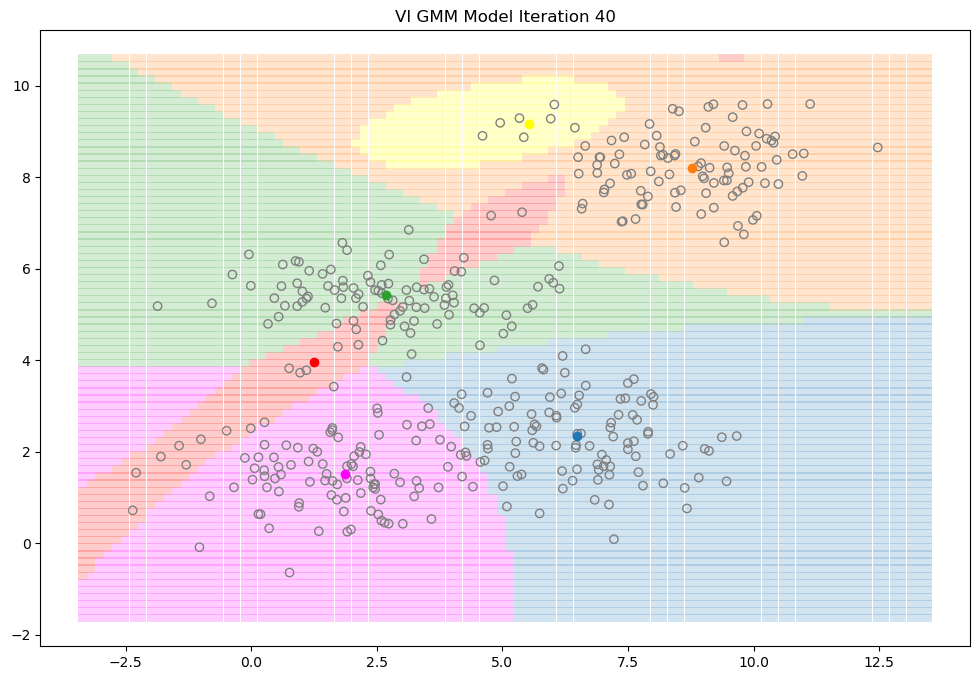

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


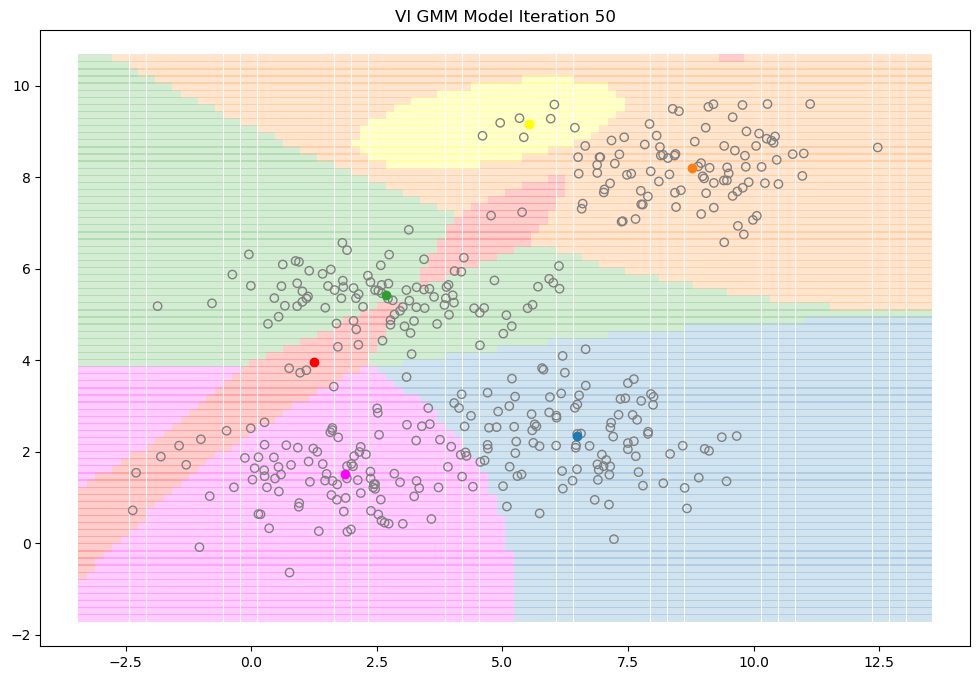

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


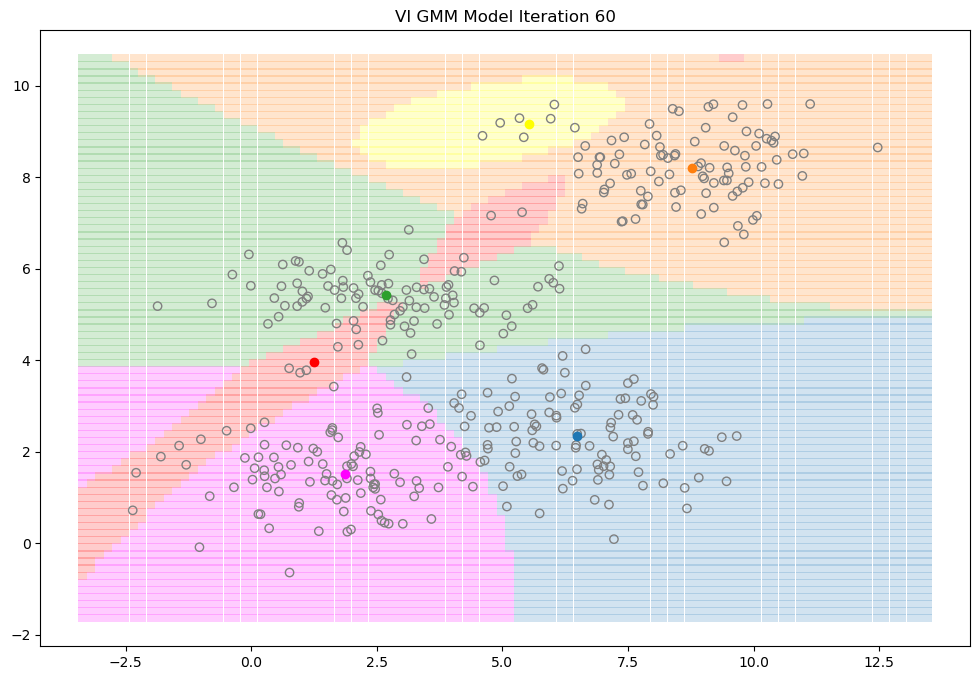

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


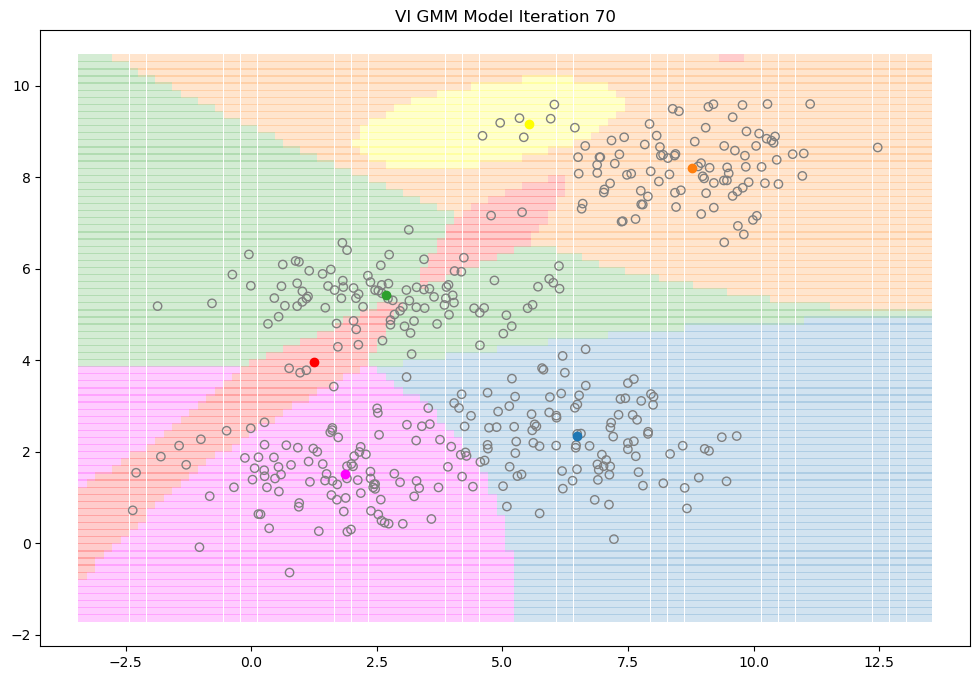

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


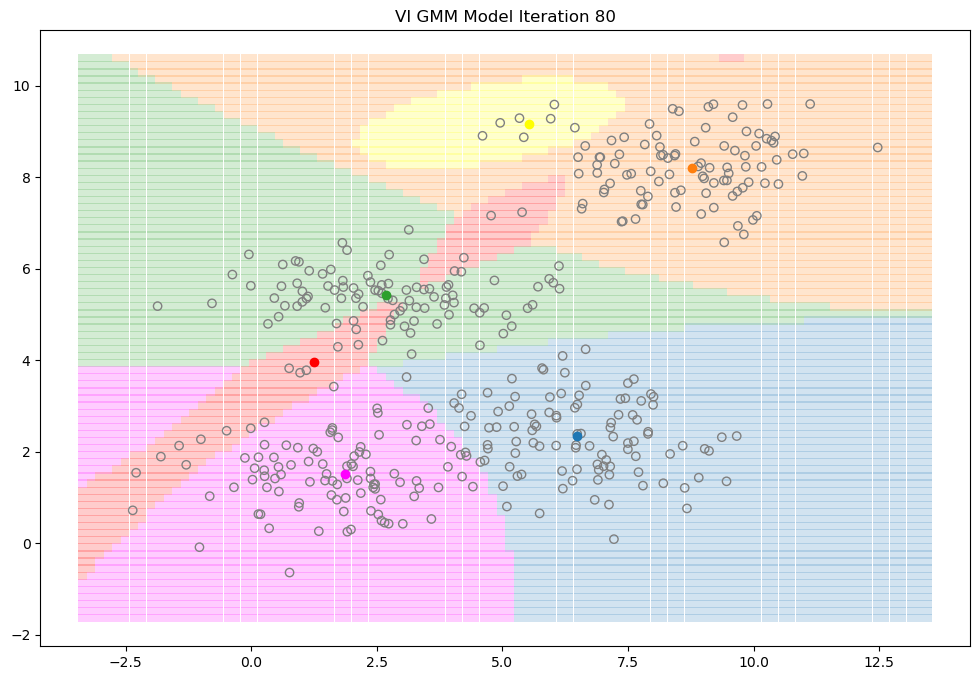

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


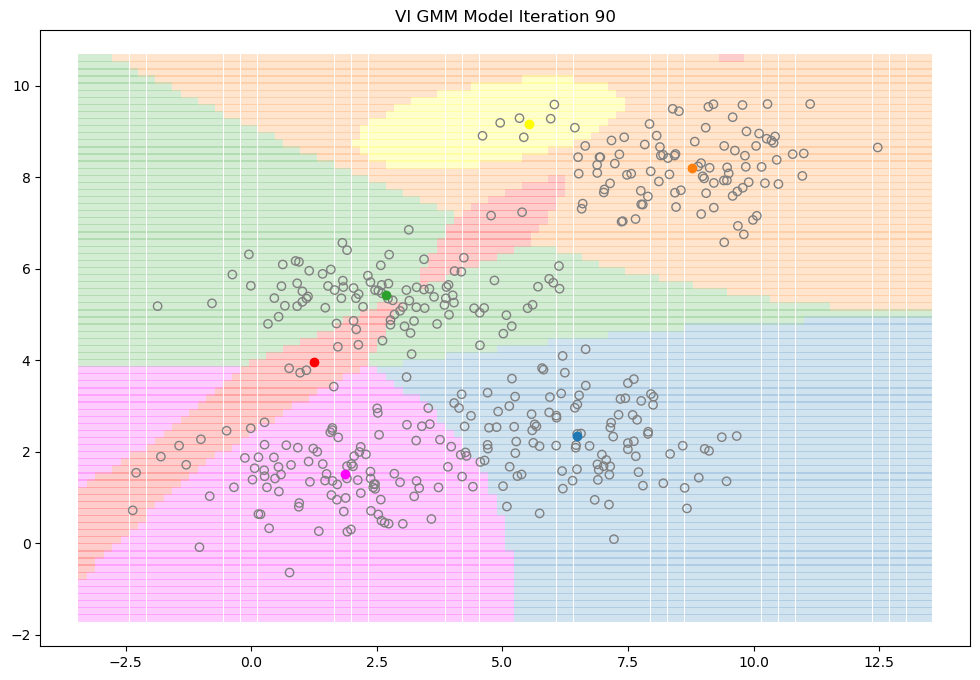

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


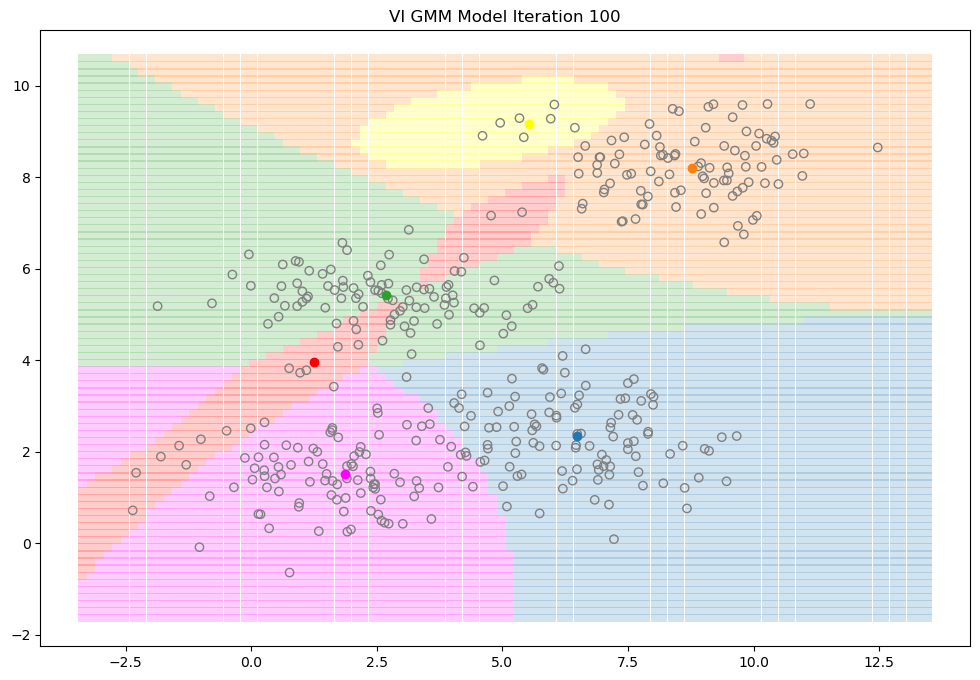

weights: [0.18806108 0.21871853 0.22835026 0.19750009 0.13379498 0.03357505],
 means:
 [[6.47774053 2.35096664]
 [8.78127269 8.20399829]
 [2.6930848  5.42383418]
 [1.87117607 1.51459936]
 [5.53918031 9.1728141 ]
 [1.25585788 3.96897524]],
 cov:
 [[[ 2.09887145 -0.26647256]
  [-0.26647256  0.6936682 ]]

 [[ 1.72591481  0.19315999]
  [ 0.19315999  0.49621589]]

 [[ 2.79338076 -0.1210423 ]
  [-0.1210423   0.26087252]]

 [[ 2.14369024  0.16923158]
  [ 0.16923158  0.55768349]]

 [[ 0.36377488  0.05720506]
  [ 0.05720506  0.05408704]]

 [[ 6.13623277  4.80844195]
  [ 4.80844195  3.84573102]]]


In [335]:

for step in range(101):

  # visualize the learned clusters
  if step % 10 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("VI GMM Model Iteration {}".format(step))
    axes = plt.gca()
    
    likelihood = []
    for j in range(k):
      likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
    predictions = np.argmax(likelihood, axis=0)
    
    for c in range(k):
      pred_ids = np.where(predictions == c)
      plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
    for j in range(k):
      plt.scatter(means[j][0], means[j][1], color=colors[j])

    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
    print(f'weights: {weights},\n means:\n {means},\n cov:\n {cov}')

  likelihood = []
  # Expectation step
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
  # for multiple dimensions - not tested
  P = likelihood.T
  stat, C, weights = channel_capacity(k, len(x), P)
  # print('Optimal value of C = {:.4g}'.format(C))
  # print(f'Optimal variable weights[{j}] = {weights} \n') 
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # updage mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    # weights[j] = np.mean(b[j])
    
    
    
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

# CNN model experiments

In [3]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!

# import pytorch_lightning as pl
import lightning as L
import torchmetrics
# from pytorch_lightning.callbacks import Callback, EarlyStopping
from lightning.pytorch.callbacks import EarlyStopping, Callback

from lightning.pytorch.tuner.tuning import Tuner

precision = "medium"
torch.set_float32_matmul_precision(precision)
criterion = nn.CrossEntropyLoss()


# use 20% of training data for validation
# train_set_size = int(len(train_dataset) * 0.8)
# valid_set_size = len(train_dataset) - train_set_size
#
# split the train set into two
# seed = torch.Generator().manual_seed(42)
# train_dataset, val_dataset = torch.utils.data.random_split(
#    train_dataset, [train_set_size, valid_set_size], generator=seed
# )


class CNNLightning(L.LightningModule):
    def __init__(self, lr=3e-4, in_channels=1, num_classes=10):
        super().__init__()
        self.lr = lr
        # breakpoint()
        self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
        self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

    def training_step(self, batch, batch_idx):
        x, y = batch
        # breakpoint()
        y_hat = self._common_step(x, batch_idx)
        loss = criterion(y_hat, y)
        accuracy = self.train_acc(y_hat, y)
        self.log(
            "train_acc_step",
            self.train_acc,
            on_step=True,
            on_epoch=False,
            prog_bar=True,
        )
        return loss

    def on_train_epoch_end(self):
        self.train_acc.reset()

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self._common_step(x, batch_idx)
        loss = F.cross_entropy(y_hat, y)
        accuracy = self.test_acc(y_hat, y)
        self.log("test_loss", loss, on_step=True)
        self.log("test_acc", accuracy, on_step=True)

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self._common_step(x, batch_idx)
        loss = F.cross_entropy(y_hat, y)
        accuracy = self.test_acc(y_hat, y)
        self.log("val_loss", loss, on_step=True)
        self.log("val_acc", accuracy, on_step=True)
        return {"val_loss": loss, "val_acc": accuracy}

    def predict_step(self, batch, batch_idx):
        x, y = batch
        # breakpoint()
        y_hat = self._common_step(x)
        return y_hat

    def _common_step(self, x, batch_idx):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(x.shape[0], -1)
        y_hat = self.fc1(x)
        return y_hat

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

    def forward(self, batch, batch_idx):
        x, y = batch
        y_hat = self._common_step(x, batch_idx)
        return y_hat



class MyPrintingCallback(Callback):
    def on_train_start(self, trainer, pl_module):
        print("Training is starting")

    def on_train_end(self, trainer, pl_module):
        print("Training is ending")


# Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/jack/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from torch.utils.data import DataLoader
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
batch_size = 512
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)), # -1 to 1
    ]
)
# Load the training data
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)

# Load the test data
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
# Set batch size (you can adjust this as needed)
batch_size = 64

# Create DataLoaders
train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    """
    Check accuracy of our trained model given a loader and a model

    Parameters:
        loader: torch.utils.data.DataLoader
            A loader for the dataset you want to check accuracy on
        model: nn.Module
            The model you want to check accuracy on

    Returns:
        acc: float
            The accuracy of the model on the dataset given by the loader
    """

    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(loader)):

        # Loop through the data
        # for x, y in data:
            # breakpoint()
            # Move data to device
            x,y = batch
            x = x.to(device=device)
            y = y.to(device=device)

            # Get to correct shape
            # x = x.reshape(x.shape[0], -1)

            # Forward pass
            scores = model(batch, batch_idx)
            _, predictions = scores.max(1)
            predictions = predictions.to(device=device)
            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples

In [6]:
model_lightning = CNNLightning()
# model_lightning.to(device)
model_lightning.load_state_dict(torch.load("./CNN_training_weights.pt"))
check_accuracy(test_loader, model_lightning)

  0%|          | 0/157 [00:00<?, ?it/s]

100%|██████████| 157/157 [00:04<00:00, 31.58it/s]


tensor(0.9838)

True y = 2, the probability: 0.99993
pixel from 1.0 to -1.0


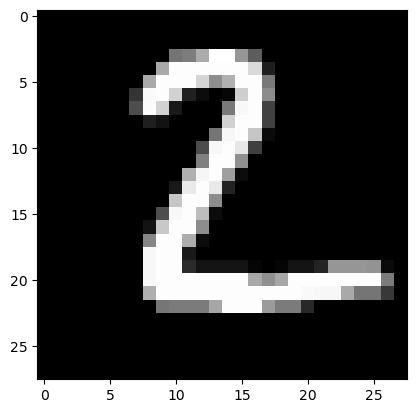

In [7]:
import matplotlib.pyplot as plt
img_id =1
input = test_loader.dataset[img_id]
img = input[0].squeeze(0).clone()
plt.imshow(img,cmap='gray')
print(f'True y = {input[1]}, the probability: {F.softmax(model_lightning([input[0].unsqueeze(0),input[1]], 0), dim=1).max():.5f}' )
print(f'pixel from {img.max()} to {img.min()}')


## Fit CNN model with GMM

In [6]:
# rescaling to 0-2

img = img +1
# img/=img.sum()
print(img.max(), img.min(), img.sum())
img.shape

tensor(2.) tensor(0.) tensor(226.2745)


torch.Size([28, 28])

pdf_values.max(): 0.008838821202516556, pdf_values.min(): 0.0


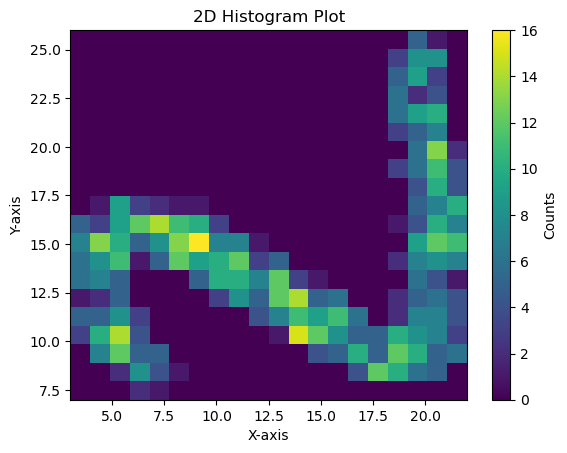

In [7]:
import numpy as np

# Step 1: Generate random points
num_points = 10000
# x = np.random.uniform(low=0, high=1, size=num_points)
# y = np.random.uniform(low=0, high=1, size=num_points)

# # Step 2: Evaluate PDF
# pdf_values = unknown_pdf(x, y)  # Replace unknown_pdf with the actual PDF function

# # Step 3: Normalize PDF
pdf_values = img.view(-1)/img.sum()

print(f'pdf_values.max(): {pdf_values.max()}, pdf_values.min(): {pdf_values.min()}')
# Step 4: Sample 1000 points
sampled_indices = np.random.choice(len(pdf_values) , size=1000, replace=True, p=pdf_values)
# sampled_points = np.column_stack((x[sampled_indices], y[sampled_indices]))


image_size = 28

x = np.array(sampled_indices) // image_size
y = np.array(sampled_indices) % image_size
# print(sampled_indices,x,y)
# converted_indices = list(zip(row_indices, col_indices))

# x,y = np.unravel_index(sampled_indices, (28, 28), order='C')
# Create a 2D histogram
plt.hist2d(x, y, bins=20, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram Plot')
plt.show()

In [8]:
import numpy as np
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)
    
    

In [9]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# print(X.shape)
c = np.array([x,y]).T
np.random.seed(42)
gmm = GMM(k=5, max_iter=20)
gmm.fit(c)
print(f'gmm.mu: \n{gmm.mu}, \ngmm.sigma: \n{gmm.sigma}')


gmm.mu: 
[array([ 9.23549775, 14.4502583 ]), array([ 5.2543479 , 11.21163275]), array([ 4.45992974, 11.86345348]), array([20.68317837, 17.49495961]), array([16.4292023 , 10.04485868])], 
gmm.sigma: 
[array([[ 6.72739266, -2.99455152],
       [-2.99455152,  2.18150783]]), array([[ 1.52033634, -1.89250939],
       [-1.89250939,  7.79377528]]), array([[ 1.02278831, -1.27129976],
       [-1.27129976,  6.29950988]]), array([[ 0.7845471 , -1.38250264],
       [-1.38250264, 21.27958878]]), array([[ 6.84212582, -2.49683148],
       [-2.49683148,  1.84769908]])]


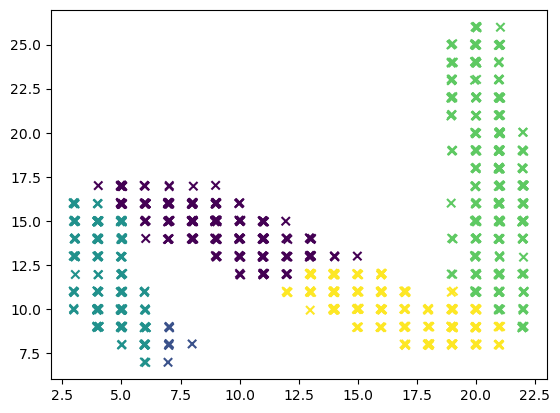

In [10]:
def jitter(x):
    return x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)
plt.scatter(
    jitter(x), 
    jitter(y), 
    c=gmm.predict(c), 
    # cmap=plt.cm.get_cmap('brg'),
    marker='x')

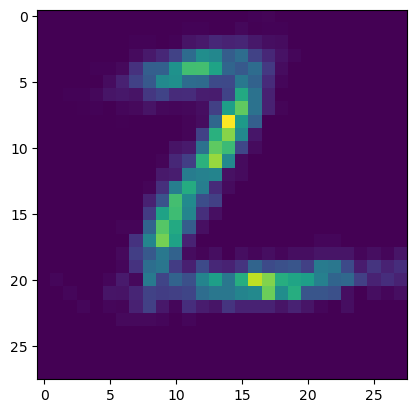

In [11]:
new_img = np.zeros((28,28))
n = 1000
for i in range(len(gmm.mu)):
    samples = np.random.multivariate_normal(gmm.mu[i], gmm.sigma[i], n)
    samples = np.clip(samples, 0, 27)
    samples = samples.astype(int)
    for s in samples:
        new_img[s[0], s[1]] += gmm.phi[i]*1/n
    
plt.imshow(new_img, cmap='viridis')

In [15]:
output = new_img * img.sum().numpy()

output.max()
gmm.mu
gmm.sigma

[array([[ 6.72739266, -2.99455152],
        [-2.99455152,  2.18150783]]),
 array([[ 1.52033634, -1.89250939],
        [-1.89250939,  7.79377528]]),
 array([[ 1.02278831, -1.27129976],
        [-1.27129976,  6.29950988]]),
 array([[ 0.7845471 , -1.38250264],
        [-1.38250264, 21.27958878]]),
 array([[ 6.84212582, -2.49683148],
        [-2.49683148,  1.84769908]])]

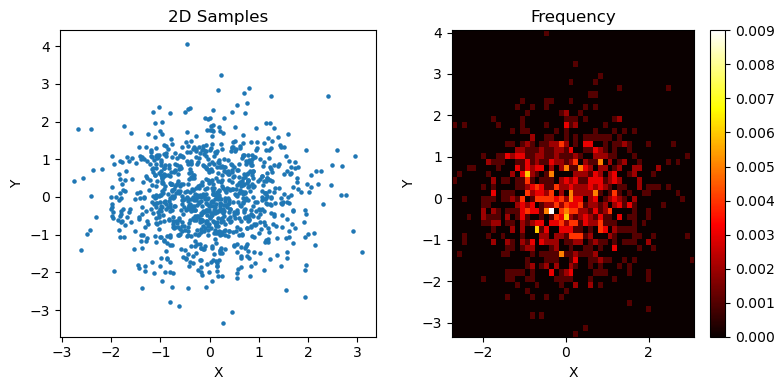

In [99]:

#!/usr/bin/env python3
# @author: R. Gowers, S. Al-Izzi, T. Pollington, R. Hill & K. Briggs

import cvxpy as cp
import numpy as np
import math
from scipy.special import xlogy

def channel_capacity(n, m, P, sum_x=1):
    '''
    Boyd and Vandenberghe, Convex Optimization, exercise 4.57 page 207
    Capacity of a communication channel.

    We consider a communication channel, with input X(t)∈{1,..,n} and
    output Y(t)∈{1,...,m}, for t=1,2,... .The relation between the
    input and output is given statistically:
    p_(i,j) = ℙ(Y(t)=i|X(t)=j), i=1,..,m  j=1,...,n

    The matrix P ∈ ℝ^(m*n) is called the channel transition matrix, and
    the channel is called a discrete memoryless channel. Assuming X has a
    probability distribution denoted x ∈ ℝ^n, i.e.,
    x_j = ℙ(X=j), j=1,...,n

    The mutual information between X and Y is given by
    ∑(∑(x_j p_(i,j)log_2(p_(i,j)/∑(x_k p_(i,k)))))
    Then channel capacity C is given by
    C = sup I(X;Y).
    With a variable change of y = Px this becomes
    I(X;Y)=  c^T x - ∑(y_i log_2 y_i)
    where c_j = ∑(p_(i,j)log_2(p_(i,j)))
    '''

    # n is the number of different input values
    # m is the number of different output values
    if n*m == 0:
        print('The range of both input and output values must be greater than zero')
        return 'failed', np.nan, np.nan

    # x is probability distribution of the input signal X(t)
    x = cp.Variable(shape=n)

    # y is the probability distribution of the output signal Y(t)
    # P is the channel transition matrix
    y = P@x
    # I is the mutual information between x and y
    c = np.sum(np.array((xlogy(P, P) )), axis=0)
    I = c@x + cp.sum(cp.entr(y) )
    print(f'c.shape: {c.shape}, x.shape: {x.shape}, y.shape: {y.shape}, I.shape: {I.shape}, P.shape: {P.shape}')
            

    # I = c@x + cp.sum(cp.entr(y) )
    # Channel capacity maximised by maximising the mutual information
    obj = cp.Maximize(I)
    constraints = [cp.sum(x) == sum_x,x >= 0]

    # Form and solve problem
    prob = cp.Problem(obj,constraints)
    prob.solve(solver=cp.ECOS)
    if prob.status=='optimal':
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan


class my_EM3:
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.std = np.ones(k)
        self.w_ij = None
        self.phi = np.ones(k) / k

    def expectation_step(self, x):
        for z_i in range(self.k):
            self.w_ij[z_i] = stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) * self.phi[z_i]
	# normalize zo that marginalizing z would lead to p = 1
        # print(f'self.w_ij.shape: {self.w_ij.shape}')
        self.w_ij /= self.w_ij.sum(0)

    def maximization_step(self, x):
        # self.phi = self.w_ij.mean(1)
        
        P = np.array([stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) for z_i in range(self.k)]).T
    
        stat, C, _phi = channel_capacity(self.k, len(x), P)
        self.phi = _phi
        print('Optimal value of C = {:.4g}'.format(C))
        print('Optimal variable phi = \n', self.phi)
        
        self.std = ((self.w_ij * (x - self.mu[:, None])**2).sum(1) / self.w_ij.sum(1))**0.5
        self.mu = (self.w_ij * x).sum(1) / self.w_ij.sum(1)
        print(f'x.shape: {x.shape}, mu.shape: {self.mu.shape}, std.shape: {self.std.shape}')
    def fit(self, x):
        
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.w_ij = np.zeros((self.k, x.shape[0]))

        last_mu = np.ones(self.k) * np.inf
        i = 0
        while ~np.all(np.isclose(self.mu, last_mu)):
            print(f'iteration: {i}')
            last_mu = self.mu
            self.expectation_step(x)
            self.maximization_step(x)
            i+=1

k = 3
m1 = my_EM(k)
m1.fit(x_i)

## Fit CNN with VI

In [12]:
import torch.distributions as dist

def ll_gaussian(y, mu, log_var):
    sigma = torch.exp(0.5 * log_var)
    return -0.5 * torch.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2))* (y-mu)**2

In [8]:
class VI(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.q_mu = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        self.q_log_var = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def reparameterize(self, mu, log_var):
        # std can not be negative, thats why we use log variance
        sigma = torch.exp(0.5 * log_var) + 1e-5
        eps = torch.randn_like(sigma)
        return mu + sigma * eps
    
    def forward(self, x):
        mu = self.q_mu(x)
        log_var = self.q_log_var(x)
        return self.reparameterize(mu, log_var), mu, log_var

In [9]:
def elbo(y_pred, y, mu, log_var):
    sigma = log_var.exp()**0.5
    # likelihood of observing y given Variational mu and sigma
    likelihood = dist.Normal(mu, sigma).log_prob(y)
    
    # prior probability of y_pred
    log_prior = dist.Normal(0, 1).log_prob(y_pred)
    
    # variational probability of y_pred
    log_p_q = dist.Normal(mu, sigma).log_prob(y_pred) 
    
    # by taking the mean we approximate the expectation
    return (likelihood + log_prior - log_p_q).mean()

def det_loss(y_pred, y, mu, log_var):
    return -elbo(y_pred, y, mu, log_var)

    
    

In [17]:
X = img.view(-1,1)
Y = input[1]
print(X.shape, Y)

torch.Size([784, 1]) 2


In [19]:
epochs = 1500

m = VI()
optim = torch.optim.Adam(m.parameters(), lr=0.005)

for epoch in range(epochs):
    optim.zero_grad()
    y_pred, mu, log_var = m(X)
    loss = det_loss(y_pred, torch.tensor(Y), mu, log_var)
    loss.backward()
    optim.step()

In [20]:
with torch.no_grad():
    print(torch.abs(m(X)[1] - Y).mean())

tensor(0.9674)


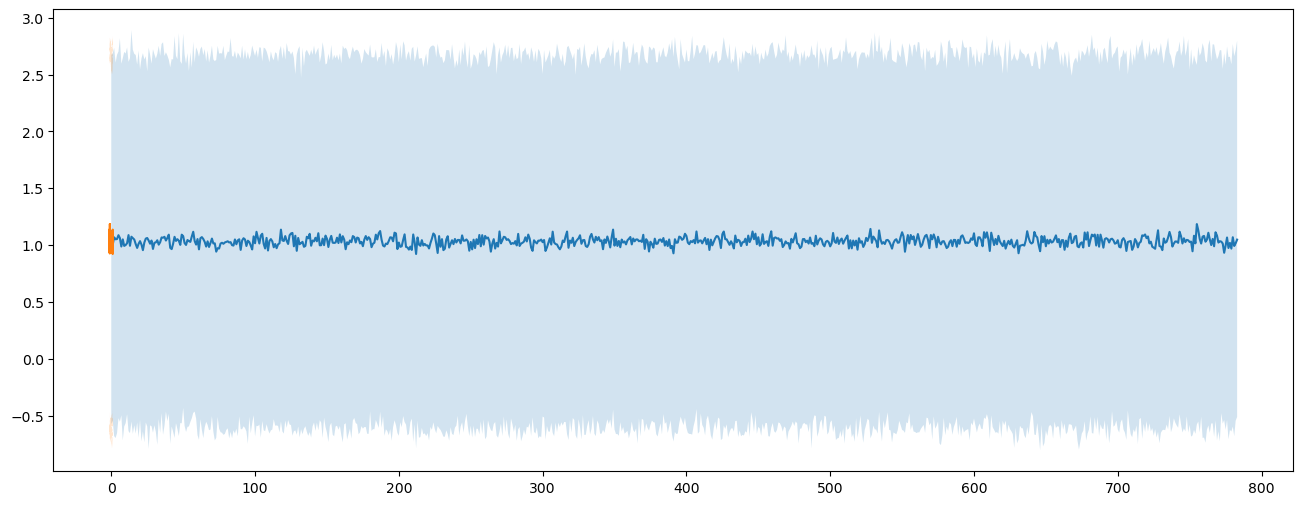

In [29]:
import numpy as np 

# draw samples from Q(theta)
with torch.no_grad():
    y_pred = torch.cat([m(X)[0] for _ in range(1000)], dim=1)
    
# Get some quantiles
q1, mu, q2 = np.quantile(y_pred, [0.05, 0.5, 0.95], axis=1)
plt.figure(figsize=(16, 6))
# plt.scatter(X, y_pred)
# plt.hist(y_pred, bins=50, alpha=0.5, density=True)
plt.plot(range(784), mu)
plt.fill_between(range(784), q1, q2, alpha=0.2)
plt.plot(X, mu)
plt.fill_between(X.flatten(), q1, q2, alpha=0.2)

In [27]:
y_pred.shape
mu.shape

(784,)

## 2d VI GMM

In [8]:
img.shape

torch.Size([28, 28])

In [9]:

import cvxpy as cp
import numpy as np
import math
from scipy.special import xlogy

def channel_capacity(n, m, P, sum_x=1):
    # n is the number of different input values
    # m is the number of different output values
    if n*m == 0:
        print('The range of both input and output values must be greater than zero')
        return 'failed', np.nan, np.nan

    # x is probability distribution of the input signal X(t)
    x = cp.Variable(shape=n)

    # y is the probability distribution of the output signal Y(t)
    # P is the channel transition matrix
    y = P@x
    # I is the mutual information between x and y
    c = np.sum(np.array((xlogy(P, P) )), axis=0)
    I = c@x + cp.sum(cp.entr(y) )
    print(f'c.shape: {c.shape}, x.shape: {x.shape}, y.shape: {y.shape}, I.shape: {I.shape}, P.shape: {P.shape}')
            

    # I = c@x + cp.sum(cp.entr(y) )
    # Channel capacity maximised by maximising the mutual information
    obj = cp.Maximize(I)
    constraints = [cp.sum(x) == sum_x,x >= 0]

    # Form and solve problem
    prob = cp.Problem(obj,constraints)
    prob.solve(solver=cp.ECOS)
    if prob.status=='optimal':
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan


In [ ]:

# VI GMM model
def make_PSD(mat):
    # Make symmetric
    k = (mat + mat.T) / 2
    # Find the minimum eigenvalue
    min_eig = np.min(np.real(np.linalg.eigvals(mat)))
    # Add a small multiple of the identity matrix
    e = np.max([0, -min_eig + 1e-4])
    mat_PSD = k + e * np.eye(mat.shape[0])
    return mat_PSD

for step in range(101):

  # visualize the learned clusters
  if step % 20 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("VI GMM Model Iteration {}".format(step))
    axes = plt.gca()
    
    likelihood = []
    for j in range(k):
      cov[j] = make_PSD(cov[j])
      likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
    predictions = np.argmax(likelihood, axis=0)
    
    for c in range(k):
      pred_ids = np.where(predictions == c)
      plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
    for j in range(k):
      plt.scatter(means[j][0], means[j][1], color=colors[j])

    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
    print(f'weights: {weights},\n means:\n {means},\n cov:\n {cov}')

  likelihood = []
  # Expectation step
  for j in range(k):
    cov[j] = make_PSD(cov[j])
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
  # for multiple dimensions - not tested
  P = likelihood.T
  stat, C, weights = channel_capacity(k, len(x), P)
  # print('Optimal value of C = {:.4g}'.format(C))
  # print(f'Optimal variable weights[{j}] = {weights} \n') 
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
    if isinstance(likelihood, float):
      likelihood = np.array([likelihood])
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # updage mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    # weights[j] = np.mean(b[j])
    
    
    
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

# MCMC

In [26]:
import numpy as np
import gc

N = 100
def my_MCMC(input = input, model=model_lightning , N=N, r= .9):
    model.eval()
  
    num_accept = 0
    list_prob = []
    samples = []
    distr = []
    distr_prob = []
    y = input[1]
    y = torch.tensor(y).to(device=device)
    test_data_old = input[0].clone()
    test_data_old = test_data_old.unsqueeze(0)
    samples.append(test_data_old)
    for epoch in range(N):
      num_variables = int(input[0].view(-1,).shape[0]*(1-r))
      print(f'Epoch:{epoch}')
      for i in range(N):
        print(f'Iteration:{i}, num_variables: {num_variables}')
        index = [np.random.choice(num_variables) for _ in range(num_variables)]
        
        # sample candidate from normal distributione
        test_data_new = input[0].clone()
        test_data_new = test_data_new.view(-1,)
        test_data_new[index] = np.random.uniform(-1, 1)
        test_data_new = test_data_new.view(1,1,28,28)
        test_data_old = samples[-1]

        with torch.no_grad():
          p_new = F.softmax(model([test_data_new, y], 0), dim=1)[0][input[1]]
          p_old = F.softmax(model([test_data_old, y], 0), dim=1)[0][input[1]]
          prob = min(1, p_new / p_old)
        #accept with the calculated probability
        if np.random.random() < prob:
            samples.append(test_data_new)
            list_prob.append(p_new)
            num_accept += 1

        #otherwise report current sample again
        else:
            samples.append(samples[-1])
            list_prob.append(p_old)
        
        num_variables = int(num_variables/r)
        if num_variables > 784:
          break
        del test_data_new
        del test_data_old
        gc.collect()
        torch.cuda.empty_cache()
    distr.append(samples)
    distr_prob.append(list_prob)
    
    return (distr, distr_prob)

output = my_MCMC()


Iteration:0, num_variables: 78
Iteration:1, num_variables: 86
Iteration:2, num_variables: 95
Iteration:3, num_variables: 105
Iteration:4, num_variables: 116
Iteration:5, num_variables: 128
Iteration:6, num_variables: 142
Iteration:7, num_variables: 157
Iteration:8, num_variables: 174
Iteration:9, num_variables: 193
Iteration:10, num_variables: 214
Iteration:11, num_variables: 237
Iteration:12, num_variables: 263
Iteration:13, num_variables: 292
Iteration:14, num_variables: 324
Iteration:15, num_variables: 360
Iteration:16, num_variables: 400
Iteration:17, num_variables: 444
Iteration:18, num_variables: 493
Iteration:19, num_variables: 547
Iteration:20, num_variables: 607
Iteration:21, num_variables: 674
Iteration:22, num_variables: 748
Iteration:0, num_variables: 78
Iteration:1, num_variables: 86
Iteration:2, num_variables: 95
Iteration:3, num_variables: 105
Iteration:4, num_variables: 116
Iteration:5, num_variables: 128
Iteration:6, num_variables: 142
Iteration:7, num_variables: 157
I

In [27]:
output[1]

[[tensor(0.9989),
  tensor(0.9983),
  tensor(0.9996),
  tensor(0.9985),
  tensor(0.9988),
  tensor(0.9967),
  tensor(0.9814),
  tensor(0.9878),
  tensor(0.9505),
  tensor(0.1319),
  tensor(0.9369),
  tensor(0.7095),
  tensor(0.4348),
  tensor(0.7517),
  tensor(0.6507),
  tensor(0.6507),
  tensor(0.6507),
  tensor(0.6507),
  tensor(0.6507),
  tensor(0.6507),
  tensor(0.6507),
  tensor(0.6507),
  tensor(0.2319),
  tensor(0.9991),
  tensor(0.9987),
  tensor(0.9991),
  tensor(0.9992),
  tensor(0.9985),
  tensor(0.9975),
  tensor(0.9939),
  tensor(0.9585),
  tensor(0.5449),
  tensor(0.5449),
  tensor(0.9325),
  tensor(0.9400),
  tensor(0.6872),
  tensor(0.6872),
  tensor(0.6872),
  tensor(0.6872),
  tensor(0.6872),
  tensor(0.5846),
  tensor(0.5846),
  tensor(0.5846),
  tensor(0.6876),
  tensor(0.5384),
  tensor(0.5384),
  tensor(0.9994),
  tensor(0.9975),
  tensor(0.9993),
  tensor(0.9984),
  tensor(0.9992),
  tensor(0.9953),
  tensor(0.9982),
  tensor(0.9984),
  tensor(0.9536),
  tensor(0

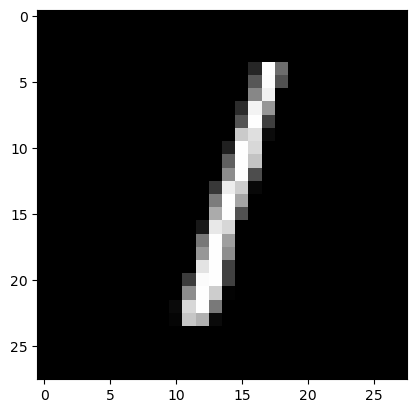

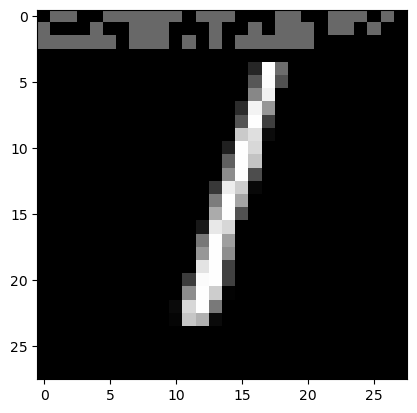

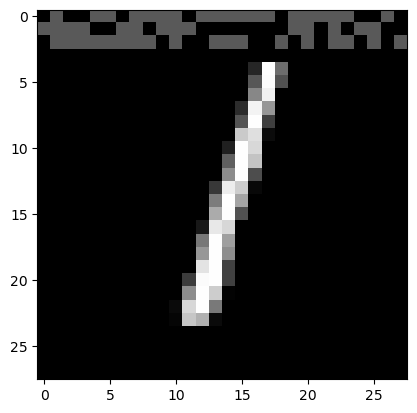

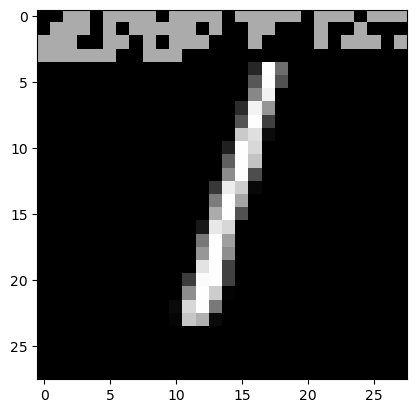

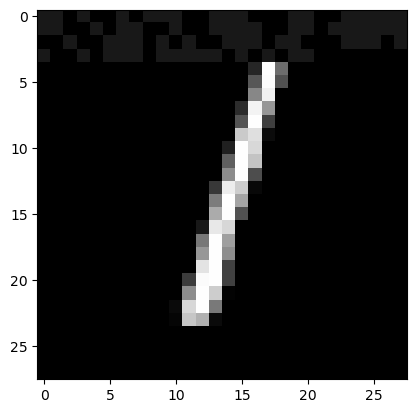

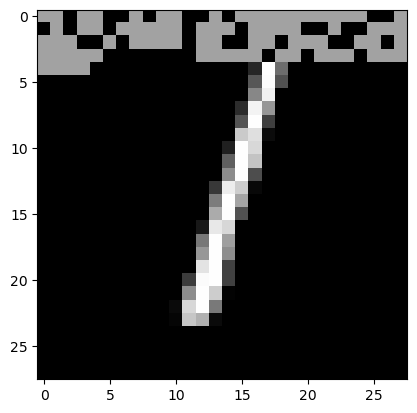

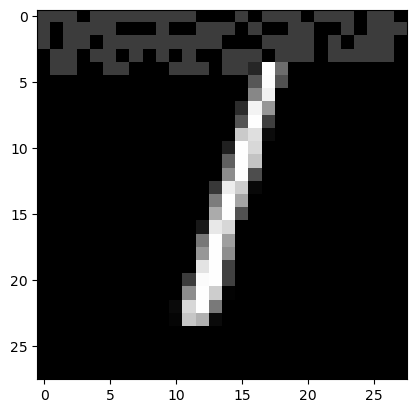

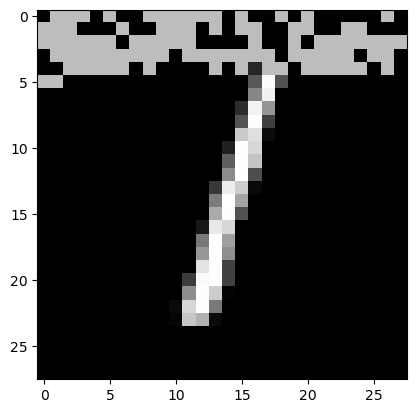

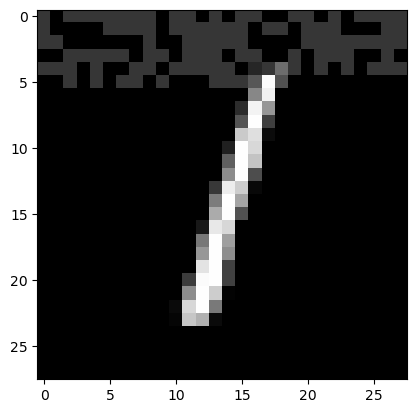

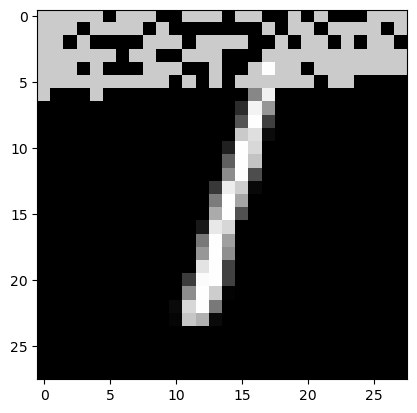

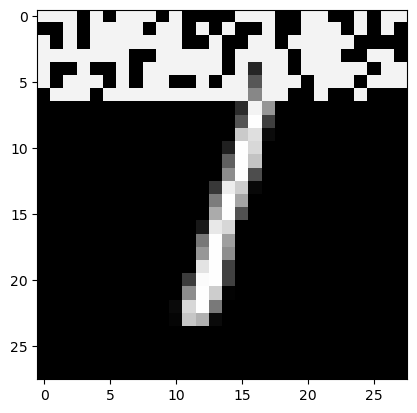

In [34]:
output[0][0][0].shape
for i in range(len(output[0][0])):
    plt.imshow(output[0][0][i].view(28,28).cpu().numpy(),cmap='gray')
    plt.show()
    if i == 10:
        break

In [61]:
class VI(nn.Module):
    def __init__(self):
        super().__init__()

        self.q_mu = nn.Sequential(
            nn.Linear(784, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        self.q_log_var = nn.Sequential(
            nn.Linear(784, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def reparameterize(self, mu, log_var):
        # std can not be negative, thats why we use log variance
        sigma = torch.exp(0.5 * log_var) + 1e-5
        # sigma = 1
        eps = torch.randn_like(log_var)
        return mu + sigma * eps

    def forward(self, x):
        mu = self.q_mu(x)
        log_var = self.q_log_var(x)
        return self.reparameterize(mu, log_var), mu, log_var
   
def ll_gaussian(y, mu, log_var):    
    return -0.5 * torch.log(2 * np.pi * torch.exp(log_var)) - (1 / (2 * torch.exp(log_var))) * (y - mu) ** 2

def elbo(y_pred, y, mu, log_var):
    # likelihood of observing y given Variational mu and sigma
    likelihood = ll_gaussian(y, mu, log_var)
    
    # prior probability of y_pred
    log_prior = ll_gaussian(y_pred, 0, torch.log(torch.tensor(1.)))
    
    # variational probability of y_pred
    log_p_q = ll_gaussian(y_pred, mu, log_var)
    
    # by taking the mean we approximate the expectation
    return (likelihood + log_prior - log_p_q).mean()

def det_loss(y_pred, y, mu, log_var):
    return -elbo(y_pred, y, mu, log_var)


In [62]:
epochs = 100
VI_m = VI()
optim = torch.optim.Adam(VI_m.parameters(), lr=0.005)
for epoch in range(epochs):
    X = input[0].clone()
    X = X.view(1,1,28,28)
    Y = F.softmax(model_lightning([X, [input[1]]], 0), dim=1)[0][input[1]]
    optim.zero_grad()
    y_pred, mu, log_var = VI_m(X.view(-1))
    loss = det_loss(y_pred, Y, mu, log_var)
    # print(f'Epoch: {epoch}, Loss: {loss}')
    loss.backward()
    optim.step()

In [63]:
VI_m(X.view(-1))

(tensor([1.2362], grad_fn=<AddBackward0>),
 tensor([0.8095], grad_fn=<ViewBackward0>),
 tensor([-2.0241], grad_fn=<ViewBackward0>))

In [199]:
class MaximumLikelihood(nn.Module):
    def __init__(self):
        super().__init__()
        self.lamb = nn.Sequential(
            nn.Linear(784, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        self.d = nn.Sequential(
            nn.Linear(784, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 784)
        )
    def forward(self, x):
        # breakpoint()
        lamb1 = self.lamb(x) *.01
        d1 = self.d(x) 
        X = x + lamb1*d1
        # model_lightning.eval()
        # output = model_lightning([X.view(1,1,28,28),input[1]],0)[0][input[1]]
        # return output, lamb, d
        return X, lamb1, d1
    
epochs = 100
md = MaximumLikelihood()
optim = torch.optim.Adam(md.parameters(), lr=0.01)

X = input[0].clone()
X = X.view(1,1,28,28)
Y = F.softmax(model_lightning([X, [input[1]]], 0), dim=1)[0][input[1]]
for i in range(10):
    for epoch in range(epochs):
        optim.zero_grad()
        X = X.view(-1)
        # y_pred, lamb, d = md(X.view(-1))
        xs, lamb1, d1 = md(X)
        model_lightning.eval()
        with torch.no_grad():
            y_pred = F.softmax(model_lightning([xs.view(1,1,28,28),[input[1]]],0),dim=1)[0][input[1]]
        loss = -(0.5 * (y_pred - Y)**2).mean()
        print(f'Epoch: {epoch}, Loss: {loss}')
        loss.backward(retain_graph=True)
        optim.step()
    X = X + lamb1*d1

Epoch: 0, Loss: -7.105427357601002e-15
Epoch: 1, Loss: -7.105427357601002e-15
Epoch: 2, Loss: -7.105427357601002e-15
Epoch: 3, Loss: -7.105427357601002e-15
Epoch: 4, Loss: -7.105427357601002e-15
Epoch: 5, Loss: -7.105427357601002e-15
Epoch: 6, Loss: -7.105427357601002e-15
Epoch: 7, Loss: -7.105427357601002e-15
Epoch: 8, Loss: -7.105427357601002e-15
Epoch: 9, Loss: -7.105427357601002e-15
Epoch: 10, Loss: -7.105427357601002e-15
Epoch: 11, Loss: -7.105427357601002e-15
Epoch: 12, Loss: -7.105427357601002e-15
Epoch: 13, Loss: -7.105427357601002e-15
Epoch: 14, Loss: -7.105427357601002e-15
Epoch: 15, Loss: -7.105427357601002e-15
Epoch: 16, Loss: -7.105427357601002e-15
Epoch: 17, Loss: -7.105427357601002e-15
Epoch: 18, Loss: -7.105427357601002e-15
Epoch: 19, Loss: -7.105427357601002e-15
Epoch: 20, Loss: -7.105427357601002e-15
Epoch: 21, Loss: -7.105427357601002e-15
Epoch: 22, Loss: -7.105427357601002e-15
Epoch: 23, Loss: -7.105427357601002e-15
Epoch: 24, Loss: -7.105427357601002e-15
Epoch: 25,

In [208]:

print(f'Original: {Y}, Variational Inference: {VI_m(X.view(-1))[0]}, Maximum Likelihood: {y_pred}')
# print(f'lamb: {lamb1}, d: {d1}')

indices = torch.where(torch.abs(d1) <.5)[0]
print(f'indices: {indices}, number of indices: {len(indices)}')
xs[indices]

Original: 0.9999314546585083, Variational Inference: tensor([0.7540], grad_fn=<AddBackward0>), Maximum Likelihood: 0.9999293088912964
indices: tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,

tensor([-0.9923, -0.9987, -0.9993, -0.9991, -1.0030, -0.9986, -1.0009, -0.9957,
        -0.9928, -0.9995, -1.0024, -1.0021, -0.9937, -1.0035, -0.9998, -1.0028,
        -0.9967, -1.0016, -1.0023, -1.0034, -0.9967, -0.9974, -0.9980, -0.9983,
        -1.0014, -0.9968, -1.0060, -0.9997, -0.9996, -0.9949, -1.0036, -1.0075,
        -1.0021, -0.9993, -1.0027, -0.9984, -0.9985, -0.9920, -1.0022, -1.0006,
        -1.0026, -0.9983, -0.9962, -1.0005, -0.9968, -0.9982, -1.0047, -0.9994,
        -0.9983, -1.0046, -1.0056, -0.9984, -0.9998, -1.0035, -1.0025, -0.9969,
        -0.9950, -0.9981, -1.0012, -0.9986, -1.0055, -0.9920, -0.9997, -1.0030,
        -0.9963, -1.0019, -1.0010, -1.0041, -1.0050, -0.9996, -1.0054, -1.0048,
        -0.9999, -0.9918, -0.9984, -0.9997, -1.0016, -0.9932, -0.9998, -0.9999,
        -0.9983, -0.9945, -0.9991, -1.0037, -0.9985, -1.0011, -1.0026, -0.9984,
        -1.0020, -1.0018, -1.0066, -1.0069, -0.9987, -1.0056, -0.0901, -0.0273,
         0.3435,  1.0029,  0.9949,  0.17

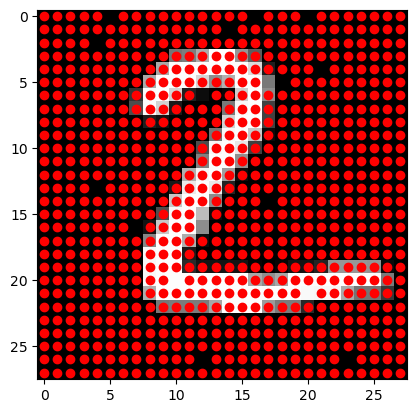

In [209]:
img = input[0].squeeze(0).clone()
num_rows = 28
num_cols = 28
plt.imshow(img ,cmap='gray')
# Calculate the 2D indices
for index in indices:
    row = index // num_cols
    col = index % num_cols

    # print(f'Single index {index} corresponds to 2D indices: Row = {row}, Column = {col}')
    img[row, col] = 1
    plt.plot(row, col, 'ro')
plt.show()

In [210]:
test = input[0].clone()
test.view(-1)[indices] = -test.view(-1)[indices]
F.softmax(model_lightning([test.view(1,1,28,28),[input[1]]],0),dim=1)[0][input[1]]

tensor(0.0144, grad_fn=<SelectBackward0>)

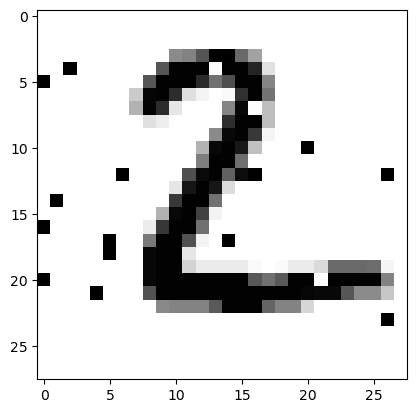

In [211]:
plt.imshow(test.view(28,28).cpu().numpy(),cmap='gray')